# LAB 1 : Unsupervised learning

Importing the python libraries for lab :
- Numppy for working with our array
- pylab or matplotlib for plotting our data
- scipy to do more advances operations on our array

In [14]:
import numpy as np
import pylab as pl
import scipy as sp

## 1.3.1 Loading the data for both DataSets :

- digits.tmz
- temper.npz

- The three matrices of the temper dataset : data, villes and varname are stored in x1
- The two matrices of the digits dataset : x and xt are stored in x2
- The two matrices of the digits dataset : y and yt are stored in y2

For the x2 matrices we do a simple pre-processing that will scale the values between 0 and 1 by dividing by 255 (range of pixels values) to have a better computation afterwards because computers work better with scaled values espacially between 0 and 1.

In [15]:
x1 = np.load('temper.npz')

data_digits = np.load('digits.npz')
x2 = data_digits['x'] / 255.0
y2 = data_digits['y']

x2 = np.concatenate((x2, data_digits['xt'] / 255.0))
y2 = np.concatenate((y2, data_digits['yt']))

## 1.3.2 Quick look at the data

Here, we only have to compute the twelwe first columns of our matrix data where are stored the tempature data for each month.
We plug also the name of months with the matrix varname and plot this using the histogram method called bar that allow us to vizualise quickly what the data looks like.
Therefore we can instantly see the logic behind the data where the summer have much higher tempeature means than the winter.

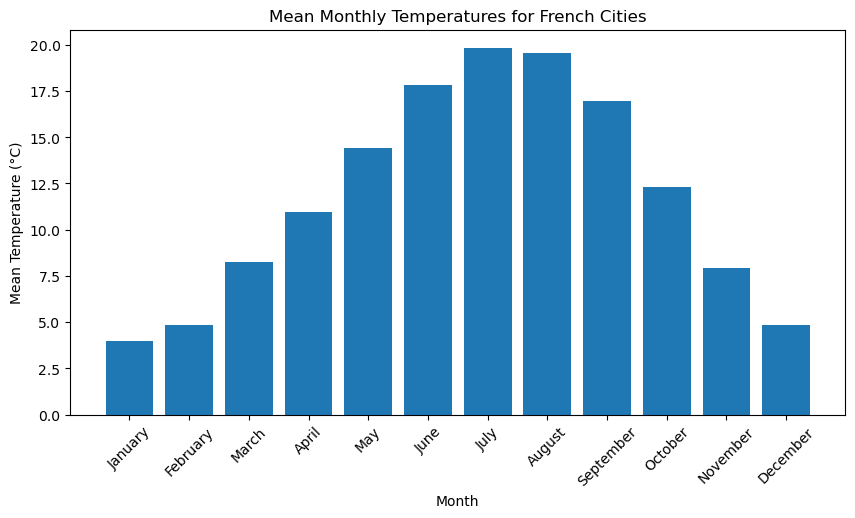

In [16]:
mean_temperatures = np.mean(x1['data'][:, :12], axis=0)
months = x1['varname'][:12]

pl.figure(figsize=(10, 5))
pl.bar(months, mean_temperatures)
pl.title('Mean Monthly Temperatures for French Cities')
pl.xlabel('Month')
pl.ylabel('Mean Temperature (°C)')
pl.xticks(rotation=45)
pl.show()

For plotting the images of our digits dataset, we have to use another method wich is 'pl.imshow'
First, we reshape the images, then we create a grid where we will output the images with a loop.
We match the images in the x2 matrix with y2 corresponding labels.

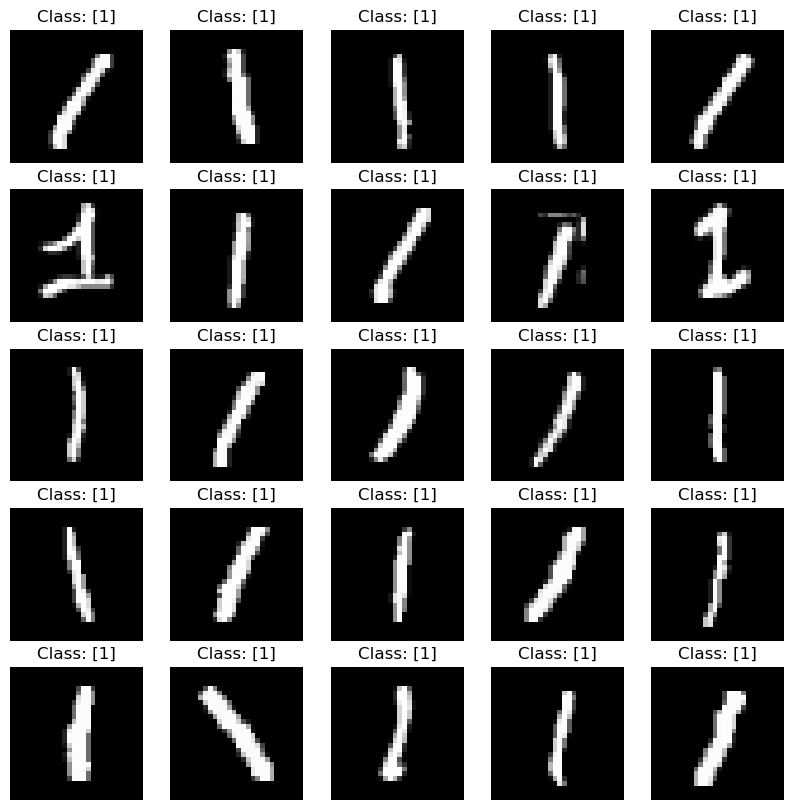

In [17]:
# Reshape the data into 28x28 images
x2_images = x2.reshape(-1, 28, 28)

# Create a grid of image subplots
pl.figure(figsize=(10, 10))
for i in range(25):
    pl.subplot(5, 5, i + 1)
    pl.imshow(x2_images[i], cmap='gray')
    pl.title(f"Class: {y2[i]}")
    pl.axis('off')

pl.show()

## 1.3.3 (Bonus) Reproducing the figures of the lab

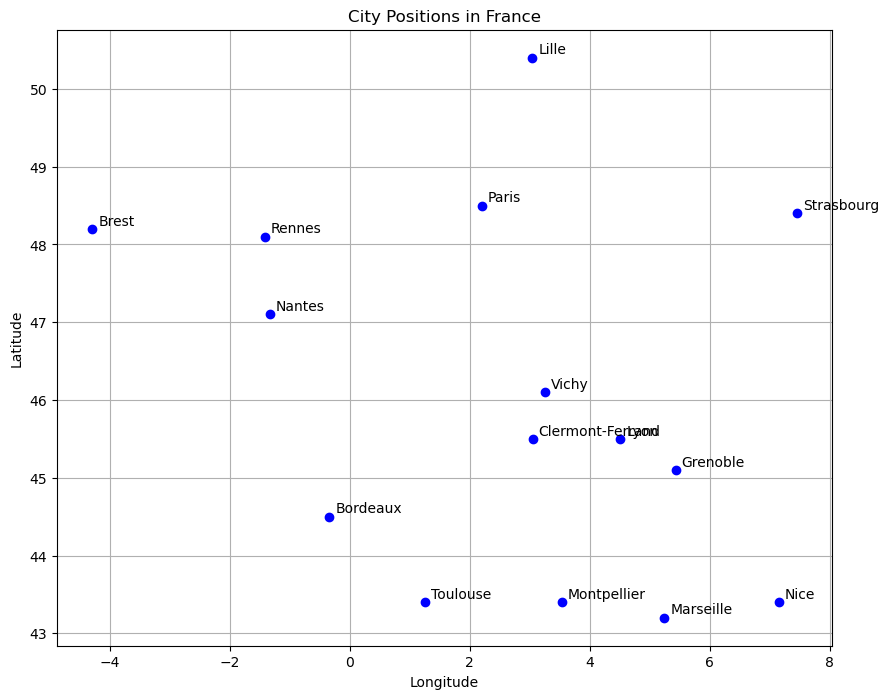

In [18]:
villes = x1['villes']  # List of city names
latitudes_longitudes = x1['data'][:, -2:]  # Latitude and longitude data

# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', color='blue')

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('City Positions in France')
pl.grid(True)
pl.show()

This visual representation will be very much adapted to test our temperatures results because we can easily see if it will make sense or not.

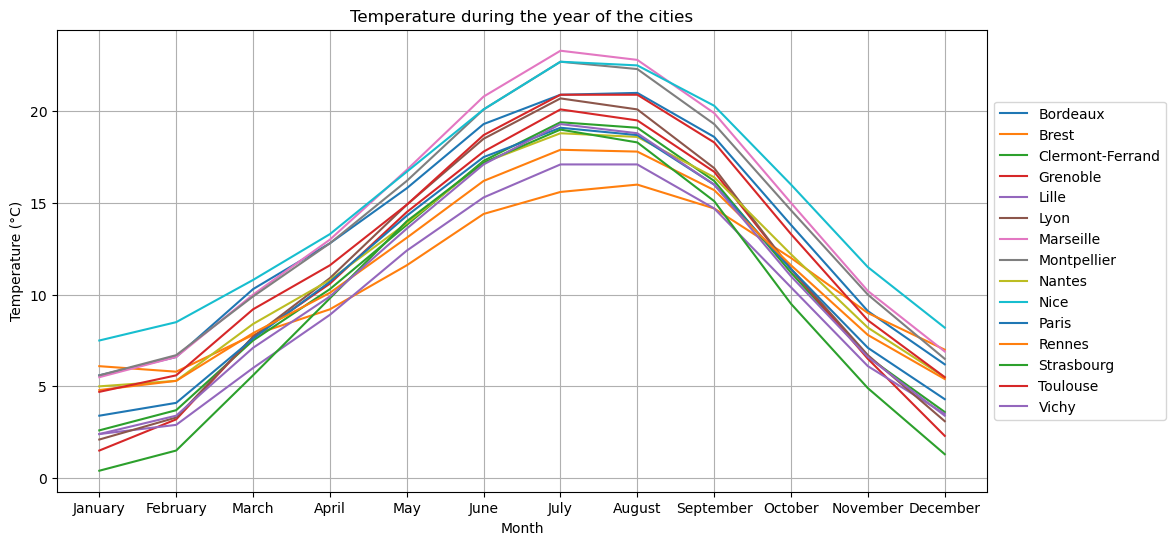

In [19]:
# create a graph with curves for each cities
pl.figure(figsize=(12, 6))
data_temperatures = x1['data'][:, :12]


for i, ville in enumerate(villes):
    pl.plot(months,data_temperatures[i], label=ville)

pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.title('Temperature during the year of the cities')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.grid(True)
pl.show()

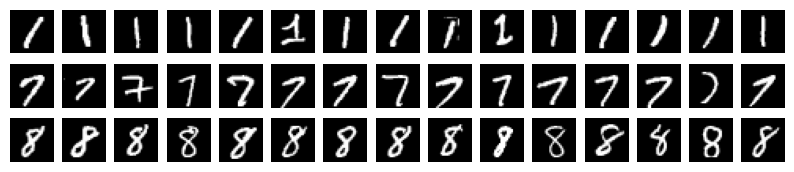

In [20]:
# Selecting the indices of the first 15 labels for each class (1, 7, 8)
class_1_indices = np.where(y2 == 1)[0][:15]
class_7_indices = np.where(y2 == 7)[0][:15]
class_8_indices = np.where(y2 == 8)[0][:15]

# Create a figure with three rows
pl.figure(figsize=(10, 2))

# plot the first 15 images of class 1
for i, idx in enumerate(class_1_indices):
    pl.subplot(3, 15, i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# plot the first 15 images of class 7
for i, idx in enumerate(class_7_indices):
    pl.subplot(3, 15, 15 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# plot the first 15 images of class 8
for i, idx in enumerate(class_8_indices):
    pl.subplot(3, 15, 30 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

pl.show()

# Clustering

For clustering we will use the sklearn libraries for ML.

First, we'll look at the temper dataset and then the digits one.

## Perform K-Means for K=3

After fitting all of our samples in the model, we can get the values of our clusters centroids and estimated classes with sklearn's "_" parameters.

Temper
Cluster Centroids temper:
[[ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666667 15.93333333
  17.43333333 17.46666667 15.6        11.93333333  8.33333333  5.96666667]
 [ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66      ]]

Estimated Classes for All Samples temper:
[2 1 0 0 0 0 2 2 1 2 0 1 0 2 0]


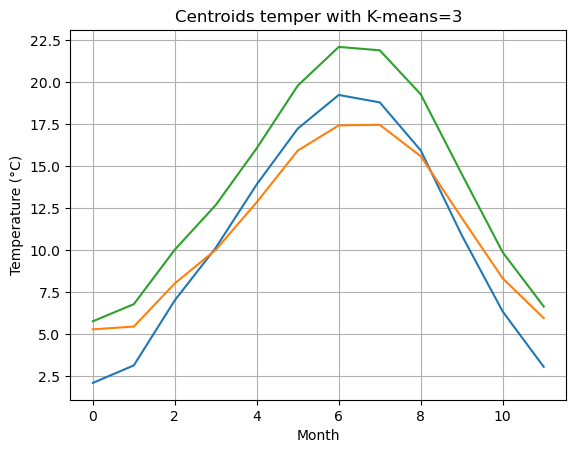

In [170]:

from sklearn.cluster import KMeans

# K-means clustering with K=3
kmeans_temper = KMeans(n_clusters=3, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_


# Access to the cluster centroids and estimated classes :
print("Temper")
print("Cluster Centroids temper:")
print(cluster_centroids_temper)
print("\nEstimated Classes for All Samples temper:")
print(estimated_classes_temper)

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T)

pl.title("Centroids temper with K-means=3")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.grid(True)
pl.show()

We note that K-Means identifies three different temperature behaviors within its three clusters.

Interpretation of the clusters:
1 - Cities that are consistently warmer.
2 & 3 - A crossover cluster, where in the first cluster we find cities that are warmer in winter and colder in summer, while in the last one, it is the opposite.

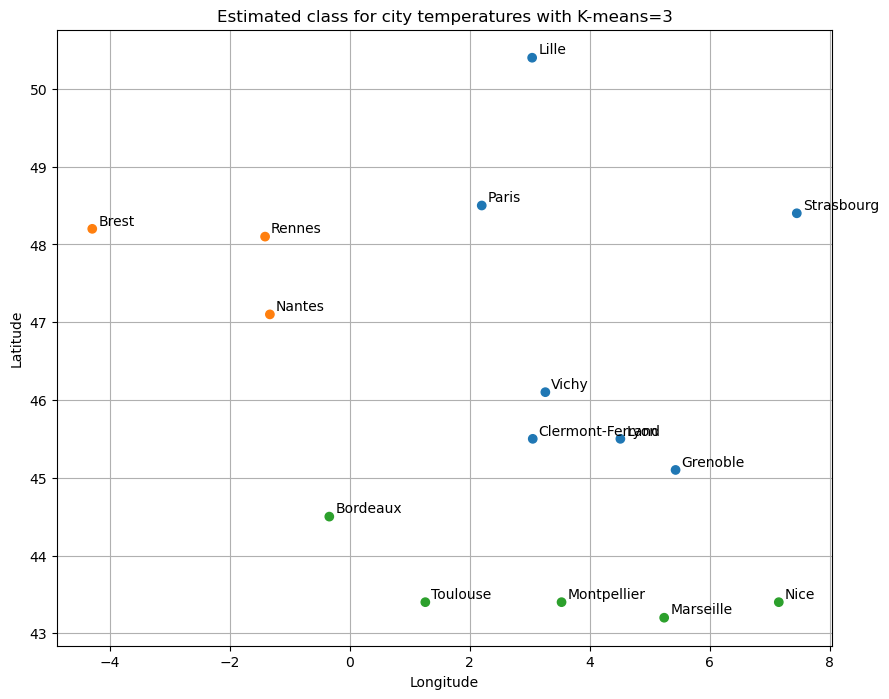

In [22]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=3')
pl.grid(True)
pl.show()

The K-Means for N=3 makes perfect sense here. Firstly, it divides the south of France where it is always hotter. Then, it separates the western cities from the eastern ones. This map corroborates our previous interpretation well because the west of France (Normandy and Brittany) is known to be more temperature-stable regions. Indeed, it is colder than the rest of France, except in winter when it is warmer than Paris. Consequently, the variance in temperature over the year in that region is smaller.

## K-means = 2 for temperature dataset

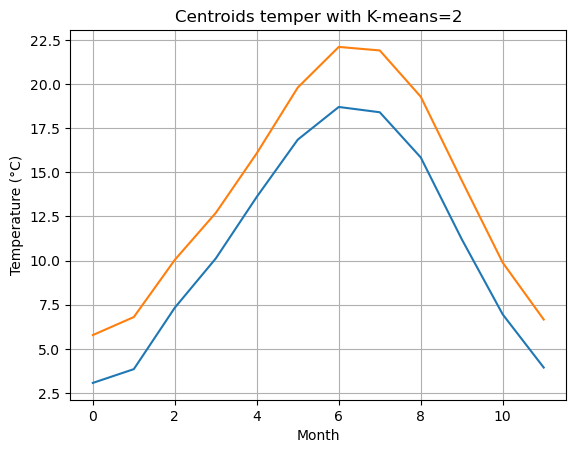

In [23]:
# K-means clustering with K=2
kmeans_temper = KMeans(n_clusters=2, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T)


pl.title("Centroids temper with K-means=2")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.grid(True)
pl.show()

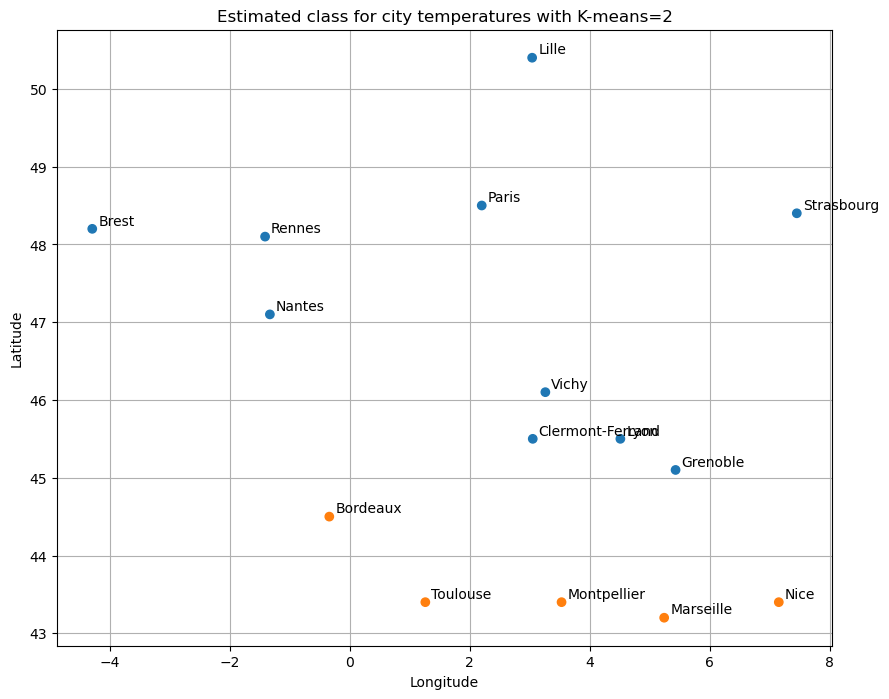

In [24]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=2')
pl.grid(True)
pl.show()

For K-Means = 2, the result is much less interesting. As expected, the algorithm will clearly separate the southern cities from the rest. There are two clusters where the temperatures show the greatest differences. However, the issue here is that we lose a lot of information for the cities that are not in France. We assume here that they exhibit the "same" behavior.

## K-means = 4 for temperature dataset

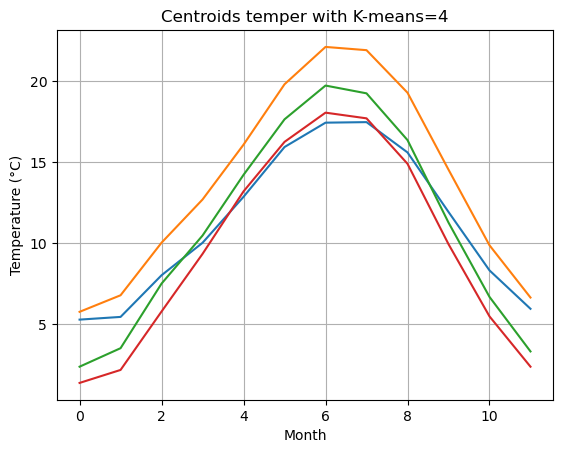

In [25]:
# K-means clustering with K=4
kmeans_temper = KMeans(n_clusters=4, random_state=0)
kmeans_temper.fit(data_temperatures)

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

#Transpose the cluster of centroids
pl.plot(cluster_centroids_temper.T)

pl.title("Centroids temper with K-means=4")
pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
# pl.legend()
pl.grid(True)
pl.show()

For K-Means = 4, the result is quite interesting. It is very similar to K-Means = 3 in terms of cluster behavior but with greater precision. Indeed, the final cluster created could be regarded as a subcluster of the two intersecting curves that we observe for K-Means = 3.

We observe a cluster (in red) where the temperature is consistently colder than elsewhere, except in summer when it can be slightly warmer than another cluster of cities.

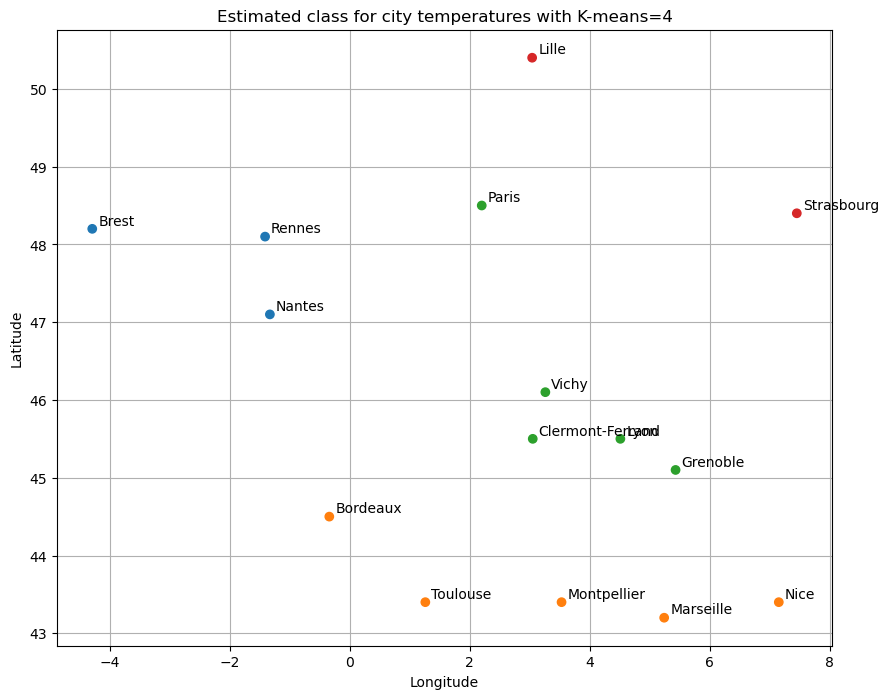

In [26]:
# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=estimated_classes_temper, cmap="tab10", vmax=9)

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Estimated class for city temperatures with K-means=4')
pl.grid(True)
pl.show()

In this data visualisation, we can clearly see where this subcluster is located. It effectively divides the central and northern regions of France, which makes sense to a native French speaker.

In conclusion, in my opinion, for this dataset, K=3 and K=4 are both reasonable choices. However, since K=4 introduces a "subcluster," K=3 could be considered the better value because it clearly illustrates three distinct temperature behavior patterns for cities.

## Digits Dataset K-means = 3

Digits
Cluster Centroids digits:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Estimated Classes for All Samples digits:
[2 2 2 ... 2 0 0]


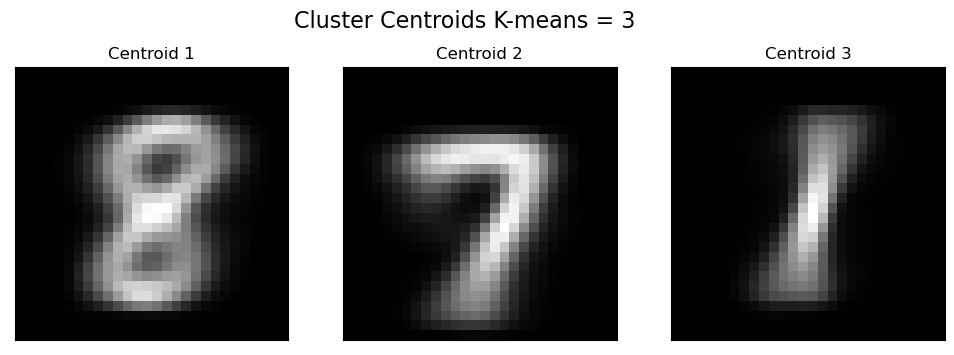

In [27]:

# K-means clustering with K=3

kmeans_digits = KMeans(n_clusters=3, random_state=0)
kmeans_digits.fit(x2)

# Get cluster centroids and estimated classes

cluster_centroids_digits = kmeans_digits.cluster_centers_
estimated_classes_digits = kmeans_digits.labels_

# Access to the cluster centroids and estimated classes :

print("Digits")
print("Cluster Centroids digits:")
print(cluster_centroids_digits)
print("\nEstimated Classes for All Samples digits:")
print(estimated_classes_digits)

# Create a figure with three subplots
fig, axes = pl.subplots(1, 3, figsize=(12, 4))

# Plot each centroid on a separate subplot
for i, centroid in enumerate(cluster_centroids_digits):
    axes[i].imshow(centroid.reshape(28, 28), cmap='gray')
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].set_title(f'Centroid {i + 1}')

fig.suptitle('Cluster Centroids K-means = 3', fontsize=16)
pl.show()


Here are the centroids for K-Means = 3. Samples are clustered by class on digits. They may appear like real images for the dataset, but they are not. The centroids are created using new pixel values based on the "superposition" of the actual images from their respective clusters.

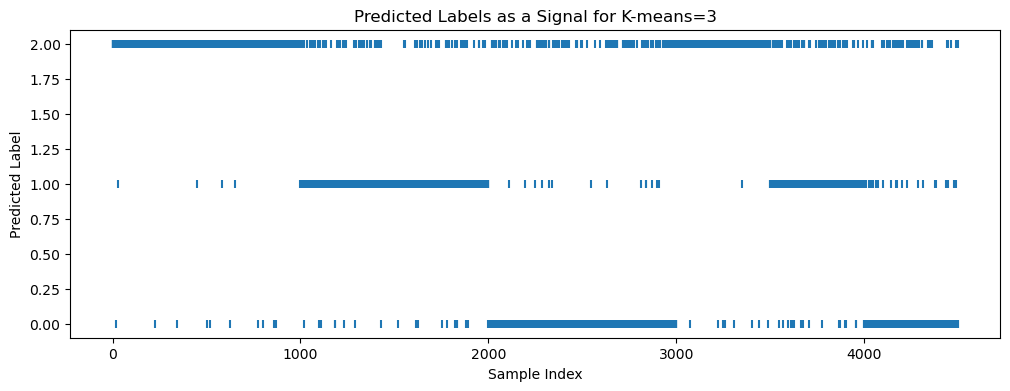

In [28]:
# Create a plot of predicted labels as a signal
pl.figure(figsize=(12, 4))
# pl.plot(estimated_classes_temper, marker='|', linestyle='-', markersize=3)
pl.scatter(range(len(estimated_classes_digits)), estimated_classes_digits, marker='|')
pl.xlabel('Sample Index')
pl.ylabel('Predicted Label')
pl.title('Predicted Labels as a Signal for K-means=3')
pl.show()

From what we can see on the plot :

- In the [0,1000] range, the the number one (class 2) is really well predicted with only a few mistakes.

- In the [1000,2000] range, the number 7 (class 1) to be predicted in often mistaken with the one. Very surprising result because if the one is so well predicted, why would the model make so many mistakes with the 7 by choosing ones?

- In the [2000,3000] range, the number 8 (class 0) is also mistaken a lot with ones. It is very much more surprising than for the range [1000,2000] because the 7 tend to be more visually close from the 1 than the 8.


## Performance of the model

In [29]:
import matplotlib.pyplot as pl
from sklearn.metrics import adjusted_rand_score, rand_score

# Initialize empty lists to store ARI and RI values
ari_values = []
ri_values = []
cluster_range = range(2, 7)  # Range of cluster values to test

# Flatten the true labels array to 1D
y2 = y2.ravel()

for n_clusters in cluster_range:
    kmeans_digits = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_digits.fit(x2)

    # Get estimated classes
    estimated_classes_digits = kmeans_digits.labels_

    # Compute ARI and RI
    ari = adjusted_rand_score(y2, estimated_classes_digits)
    ri = rand_score(y2, estimated_classes_digits)

    # Append the ARI and RI values to the lists
    ari_values.append(ari)
    ri_values.append(ri)

print('ARI Values :', ari_values)
print('RI Values :', ri_values)


ARI Values : [0.4213995325649687, 0.7481880864638025, 0.6680520157869276, 0.5939251173076758, 0.4858528451100564]
RI Values : [0.7085167568101554, 0.8876126546639994, 0.860638956805216, 0.8356797312983132, 0.7995752142451409]


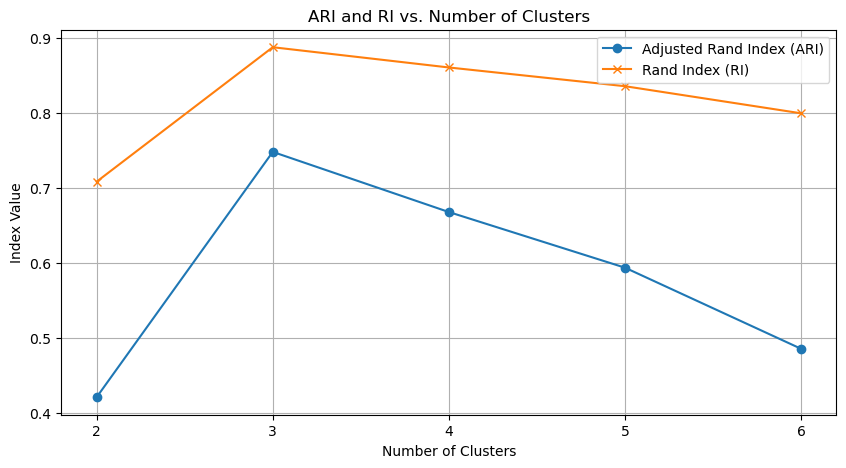

In [30]:
# Create a plot to visualize the ARI and RI values
pl.figure(figsize=(10, 5))
pl.plot(cluster_range, ari_values, marker='o', label='Adjusted Rand Index (ARI)')
pl.plot(cluster_range, ri_values, marker='x', label='Rand Index (RI)')
pl.xlabel('Number of Clusters')
pl.ylabel('Index Value')
pl.title('ARI and RI vs. Number of Clusters')
pl.xticks(cluster_range)
pl.legend()
pl.grid(True)
pl.show()

K = 3 leads to the best score, obviously because we have three examples of digits in our dataset. Therefore, the best score must correspond to the K-means algorithm that finds three clusters (1, 7, and 8).

## 3. Density estimation

## Temper Dataset

In [31]:
from sklearn.mixture import GaussianMixture

def gmm_temper_plot(n_components, covariance_type, random_state):

    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=random_state)

    # Fit the GMM model to the data
    gmm.fit(data_temperatures)

    # Get the estimated covariances for each component
    covariances_temper = gmm.covariances_
    centroids_temper = gmm.means_


    # Predict the component memberships for each sample
    component_memberships_temper = gmm.predict(data_temperatures)

    log_proba = gmm.score_samples(data_temperatures)

    params_temper = {
        "log_likelihood" : log_proba
    }
    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2, figsize=(12, 5))

    # Plot centroids in the first subplot
    for i in range(len(centroids_temper)):
        axes[0].plot(centroids_temper[i,:], label = f"centroid {i+1}")
    axes[0].legend()
    axes[0].set_xlabel("Months")
    axes[0].set_ylabel("Temperature (°C)")
    axes[0].set_title(f"Centroids with GMM with K={n_components}, cov = {covariance_type}")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid()

    # Plot scatter plot of component memberships in the second subplot
    axes[1].scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', c=component_memberships_temper)

    # Add data labels close to the points with smaller font size
    for i, ville in enumerate(villes):
        axes[1].annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title(f'Component Memberships, K={n_components}')
    axes[1].grid()

    pl.tight_layout()
    pl.show()

    return params_temper

### K=2

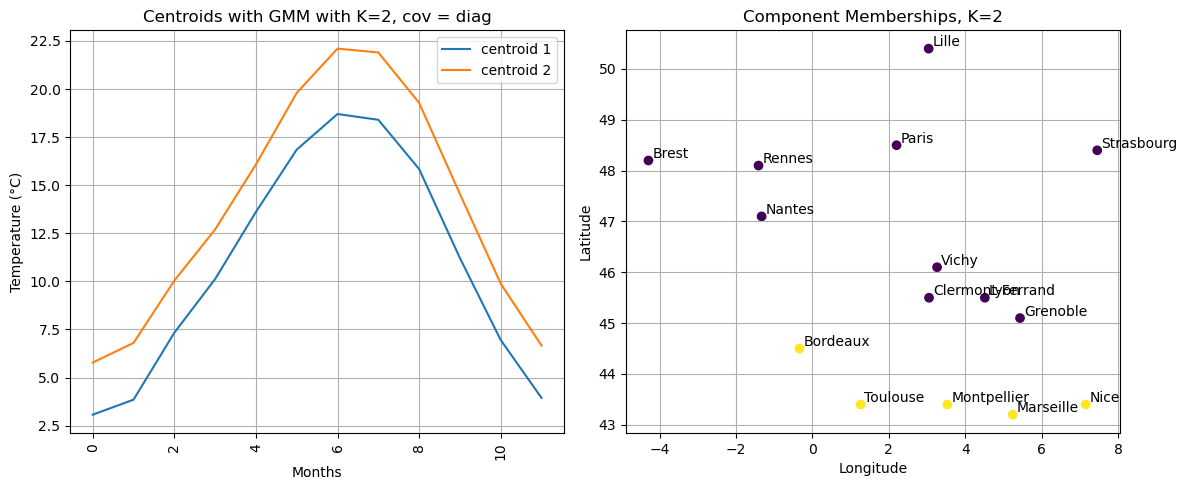

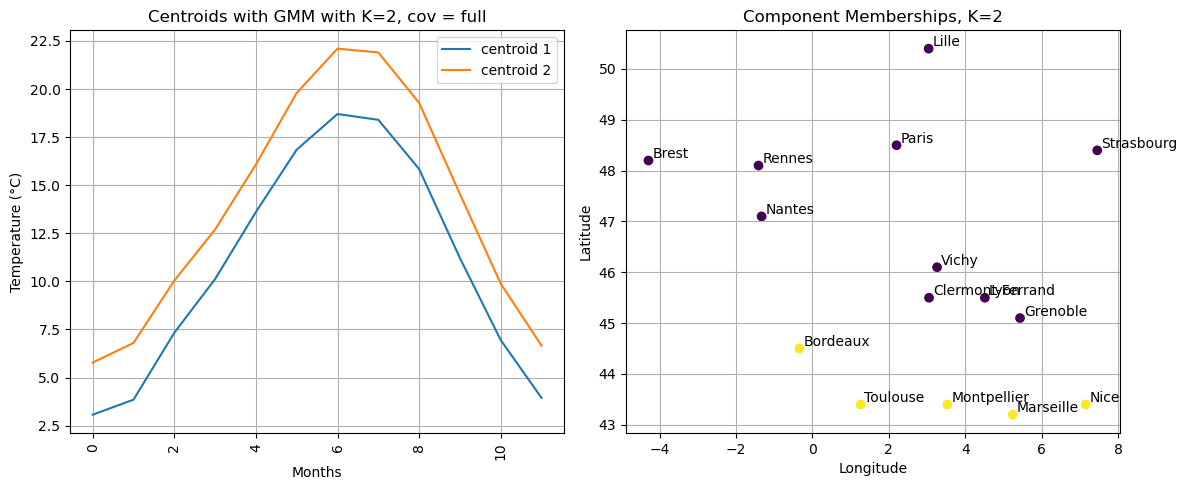

{'log_likelihood': array([42.8382873 , 18.72894759, 18.72997793, 18.72883809, 18.72916012,
        18.731348  , 42.83831107, 42.83836156, 18.72983227, 42.83828298,
        18.72998682, 18.73009169, 18.72901978, 42.83828905, 18.7306807 ])}

In [32]:
params_temper2 = gmm_temper_plot(2,"diag",0)
gmm_temper_plot(2,"full",0)

## K=3

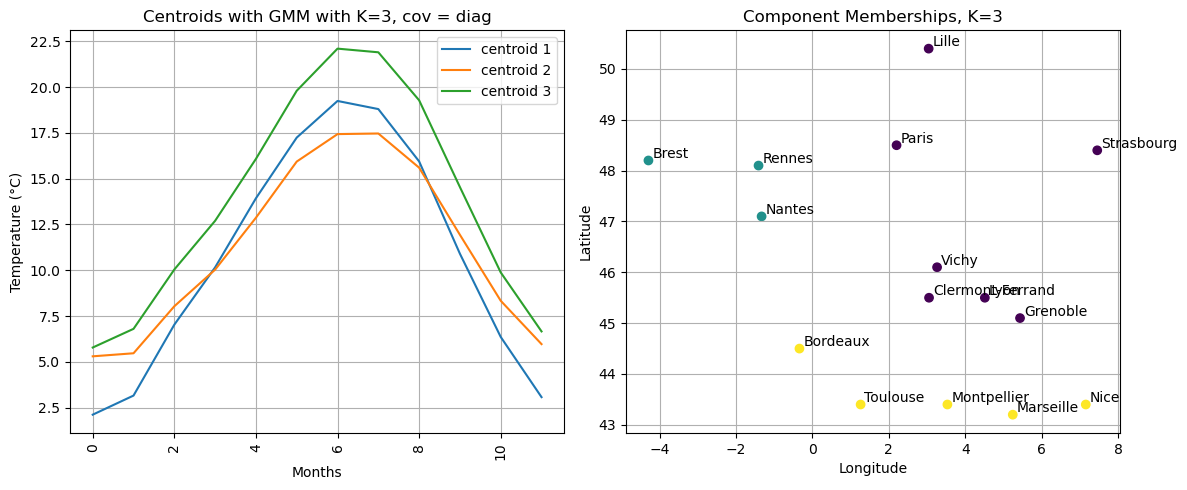

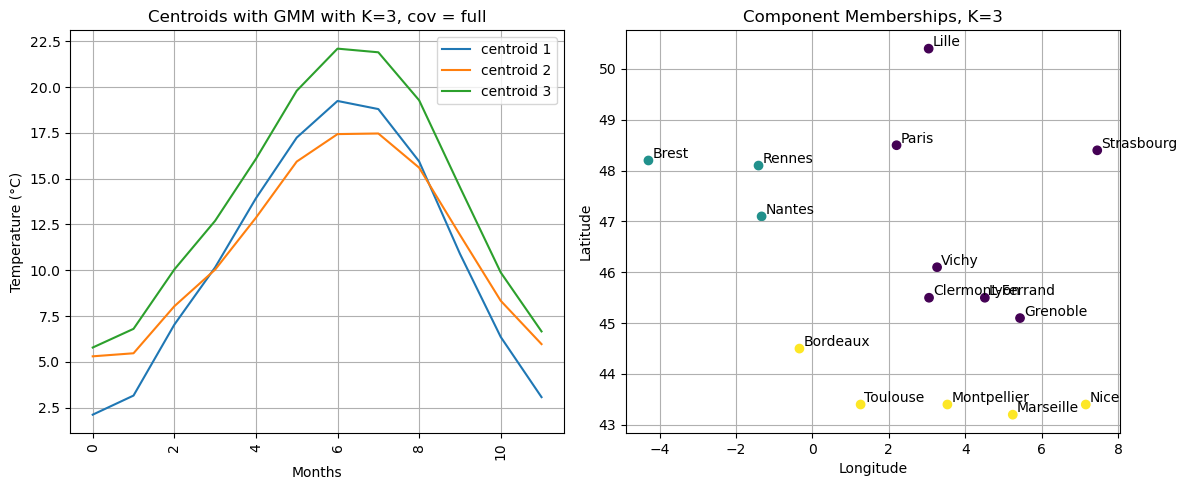

{'log_likelihood': array([42.8382873 , 55.02743241, 32.41716901, 32.4169512 , 32.41700526,
        32.41710015, 42.83831107, 42.83836156, 55.02743365, 42.83828298,
        32.41695258, 55.02743499, 32.41693007, 42.83828905, 32.41727929])}

In [33]:
params_temper3 = gmm_temper_plot(3,"diag",0)
gmm_temper_plot(3,"full",0)

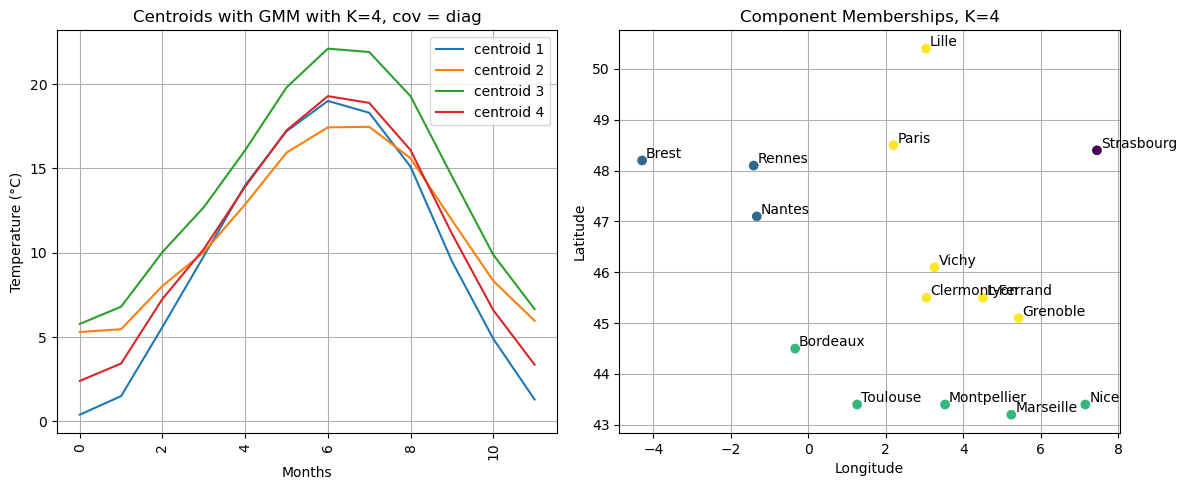

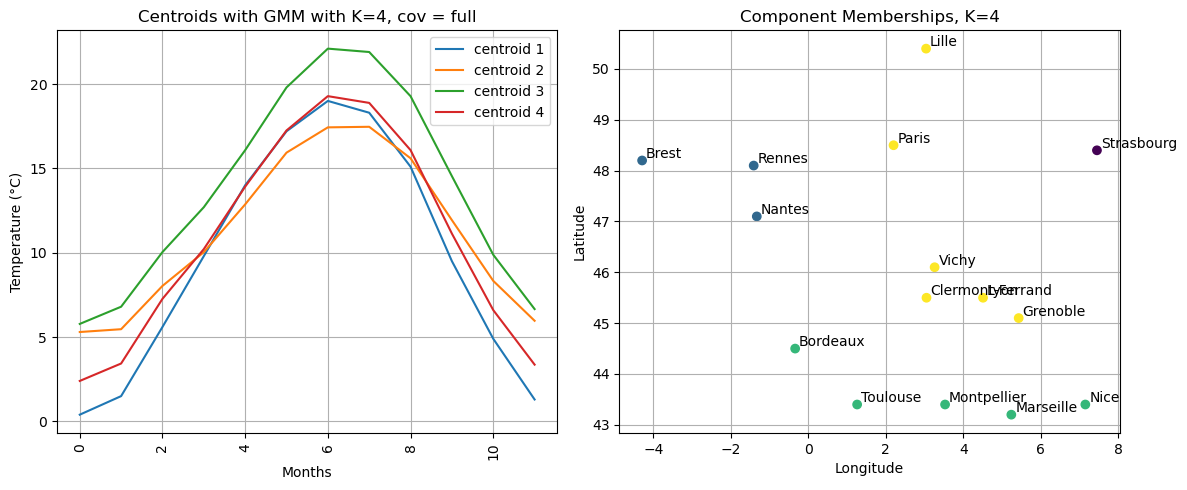

{'log_likelihood': array([42.8382873 , 55.02743241, 38.57021332, 38.5700746 , 38.57007131,
        38.57010514, 42.83831107, 42.83836156, 55.02743365, 42.83828298,
        38.57006991, 55.02743499, 69.15775075, 42.83828905, 38.57028292])}

In [34]:
params_temper4 = gmm_temper_plot(4,"diag",0)
gmm_temper_plot(4,"full",0)

The shape of the covariance matrix does not seem to change on this dataset as a result of our centers for the different Gaussian distributions we tested.

- K=3 appears to be the best option for Gaussian distributions because we can clearly see 3 distinct clusters with significance.

- For K=2, we only observe the difference between the south and north, which is not sufficient to capture all the different temperature patterns in the country.

- However, for K=4, we have a cluster in which there is only one city: Strasbourg. Having only one city in a cluster is not very interesting because it is more of an outlier than a real cluster.

## Log-probabities for samples

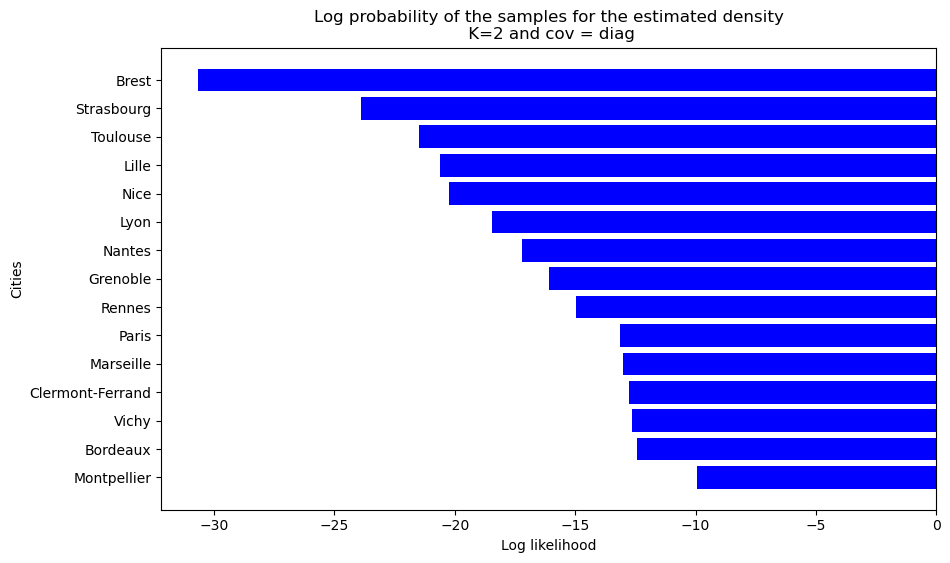

In [35]:
log_likelihood_temper = params_temper2['log_likelihood']
sorted_indices_temper = np.flip(np.argsort(log_likelihood_temper))

figure = pl.figure(figsize=(10,6))

pl.barh(villes[sorted_indices_temper], log_likelihood_temper[sorted_indices_temper], color="blue")
pl.ylabel("Cities")
pl.xlabel("Log likelihood")
pl.title("Log probability of the samples for the estimated density\n K=2 and cov = diag")
pl.show()

The most likely outlier in the GMM density distribution is Brest. This makes sense because Brest is the city in France with the least temperature variation throughout the year.



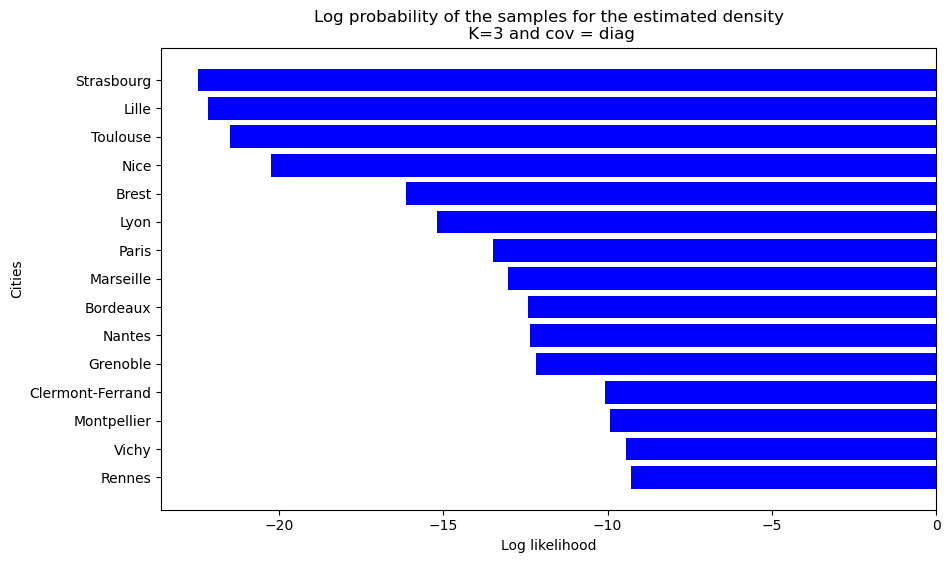

In [36]:
log_likelihood_temper = params_temper3['log_likelihood']
sorted_indices_temper = np.flip(np.argsort(log_likelihood_temper))

figure = pl.figure(figsize=(10,6))

pl.barh(villes[sorted_indices_temper], log_likelihood_temper[sorted_indices_temper], color="blue")
pl.ylabel("Cities")
pl.xlabel("Log likelihood")
pl.title("Log probability of the samples for the estimated density\n K=3 and cov = diag")
pl.show()

We see that the results depends a lot on the number of clusters, brest is not anymore first, Strasbourg lead here as an oulier

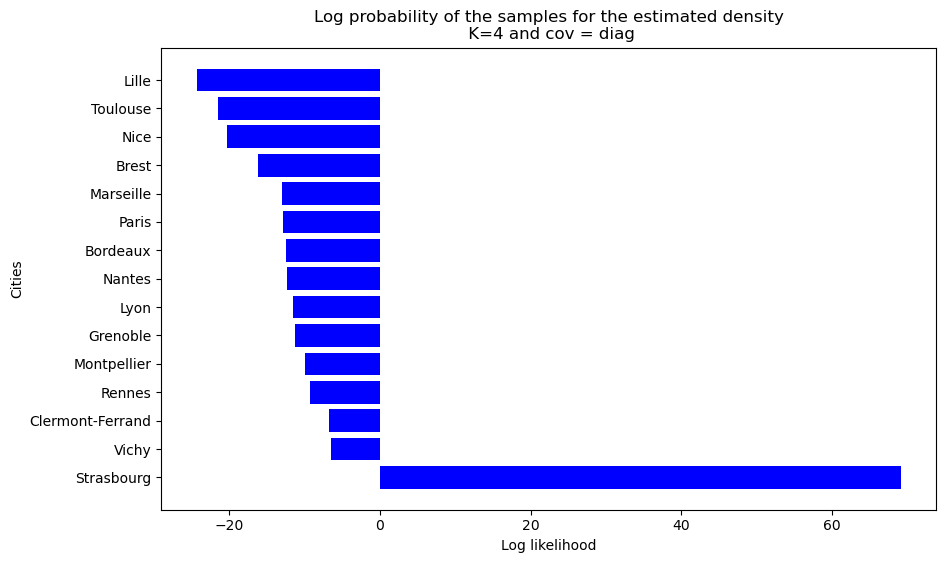

In [37]:
log_likelihood_temper = params_temper4['log_likelihood']
sorted_indices_temper = np.flip(np.argsort(log_likelihood_temper))

figure = pl.figure(figsize=(10,6))

pl.barh(villes[sorted_indices_temper], log_likelihood_temper[sorted_indices_temper], color="blue")
pl.ylabel("Cities")
pl.xlabel("Log likelihood")
pl.title("Log probability of the samples for the estimated density\n K=4 and cov = diag")
pl.show()

The result for K=4 may be suprising at first because strasbourg for K=3 was first and here it is last by far. This is simply explain by the fact that for K=4, Strasbourg is alone in one cluster, that's why the log-probablity is so high.

In conclusion, the log-probability that appears to make the more sense for me is for K=2.

In [38]:
# Define the range of K values and covariance types to explore
K_values = range(2, 4)
covariance_types = ["full", "tied", "diag", "spherical"]

# Initialize variables to store the best combination of parameters
best_combination = {"K": 0, "covariance_type": ""}
highest_log_likelihood = -1e5  # Initialize with a very low value

# Iterate over K values and covariance types to find the best combination
for K in K_values:
    for covariance_type in covariance_types:
        # Fit a GMM with the current parameters
        gmm = GaussianMixture(n_components=K, covariance_type=covariance_type, random_state=0).fit(data_temperatures)

        # Compute the log likelihood of the data under the model
        log_likelihood = gmm.score(data_temperatures)

        # Check if the current combination has a higher log likelihood
        if log_likelihood > highest_log_likelihood:
            best_combination["K"] = K
            best_combination["covariance_type"] = covariance_type
            highest_log_likelihood = log_likelihood

print("Best combination for GMM according to log likelihood:", best_combination)


Best combination for GMM according to log likelihood: {'K': 3, 'covariance_type': 'full'}


According to the log-likelihood, the best one is for K=3 and full as the shape of covariance which is not what I expected at first but I'm note surprised as k=3 has a least variance of log-probabilities than K=2.

## Digits Dataset

## K=3

In [39]:
def gmm_digits_plot(n_components, covariance_type, random_state):
    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=random_state)

    # Fit the GMM model to the data
    gmm.fit(x2)

    # Get the estimated means for each component (centroids)
    centroids = gmm.means_.reshape(-1, 28, 28)

    log_proba = gmm.score_samples(x2)

    params_digits = {
        "log_likelihood" : log_proba
    }
    # Create a figure with subplots
    fig, axes = pl.subplots(1, n_components, figsize=(12, 4))

    # Plot each centroid on a separate subplot
    for i, centroid in enumerate(centroids):
        axes[i].imshow(centroid, cmap='gray')
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        axes[i].set_title(f'Centroid {i + 1}')

    fig.suptitle(f'Cluster Centroids GMM K={n_components} and cov = {covariance_type}', fontsize=16)
    pl.show()

    return params_digits

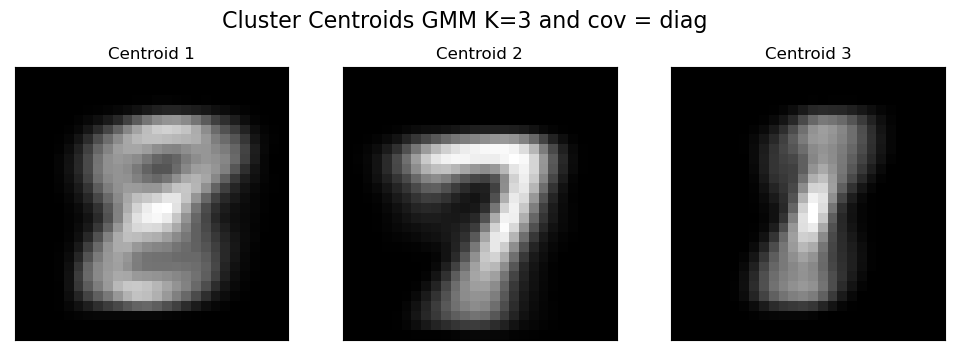

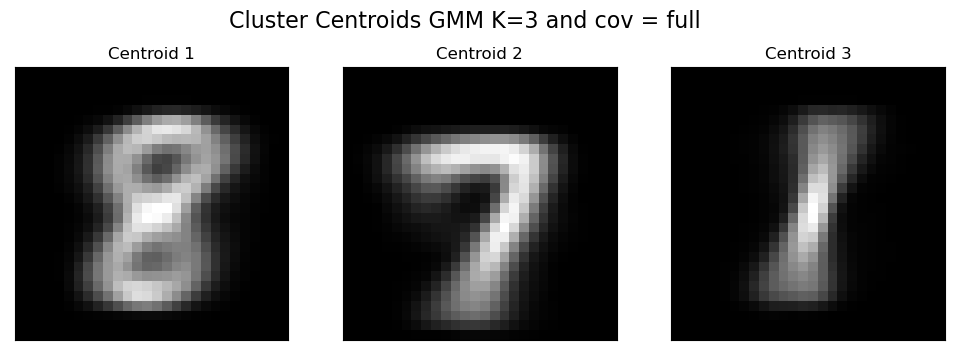

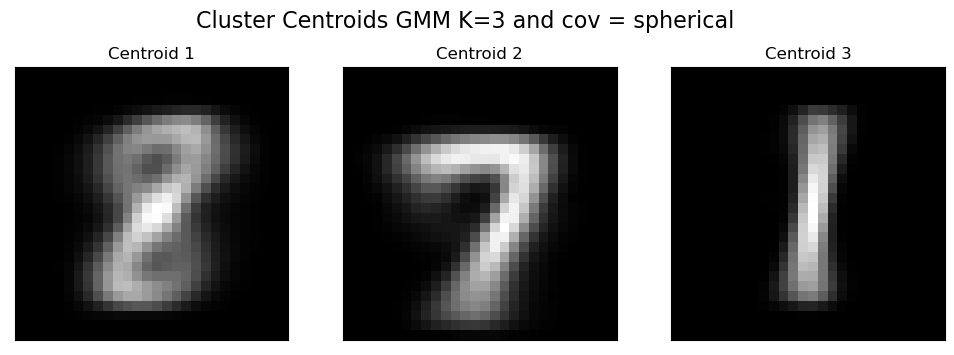

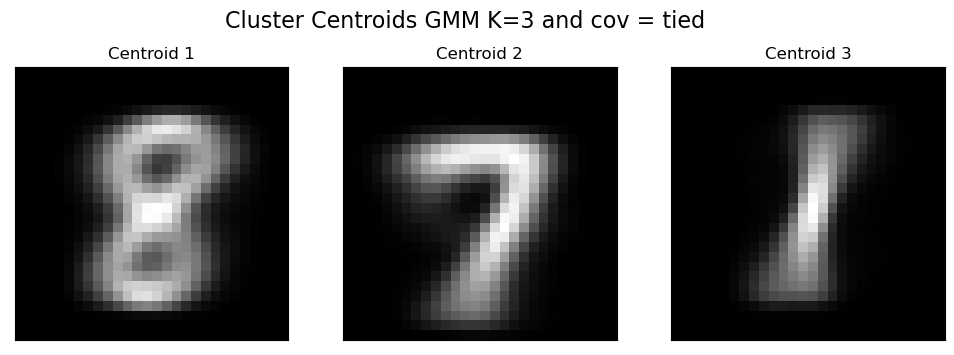

{'log_likelihood': array([2201.17265587, 2195.1935403 , 2220.33889886, ..., 2057.88540831,
        2027.47622408, 1977.95143226])}

In [40]:
params_digits3 = gmm_digits_plot(3,"diag",0)
gmm_digits_plot(3,"full",0)
gmm_digits_plot(3,"spherical",0)
gmm_digits_plot(3,"tied",0)



## K=4

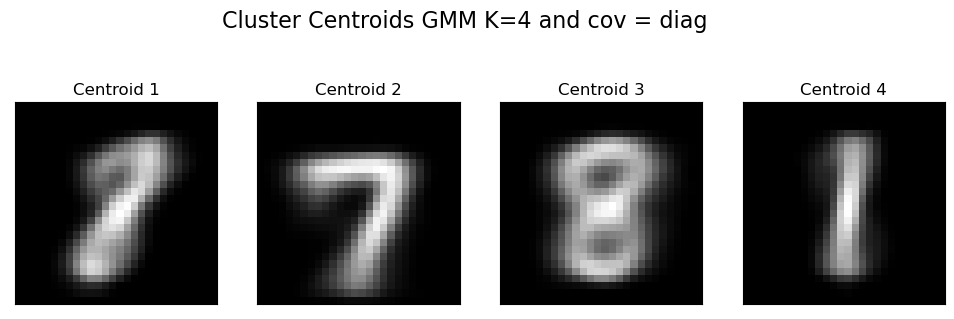

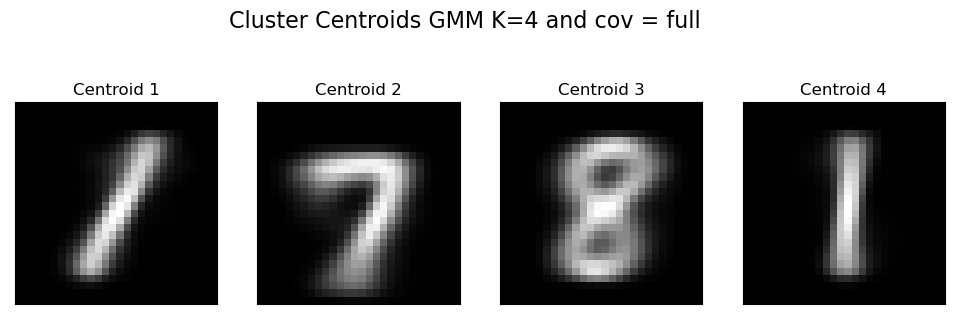

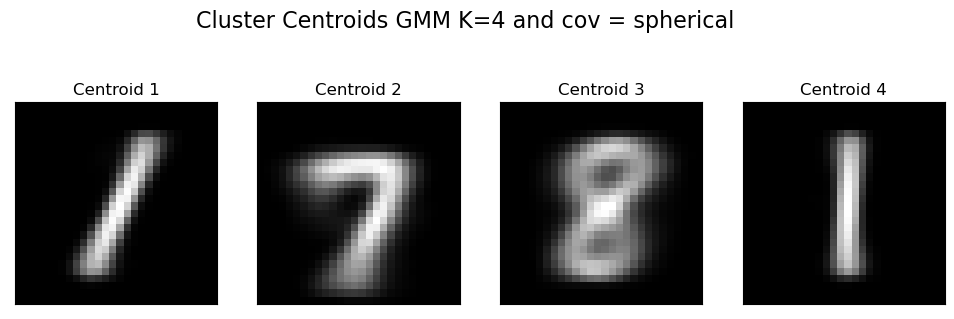

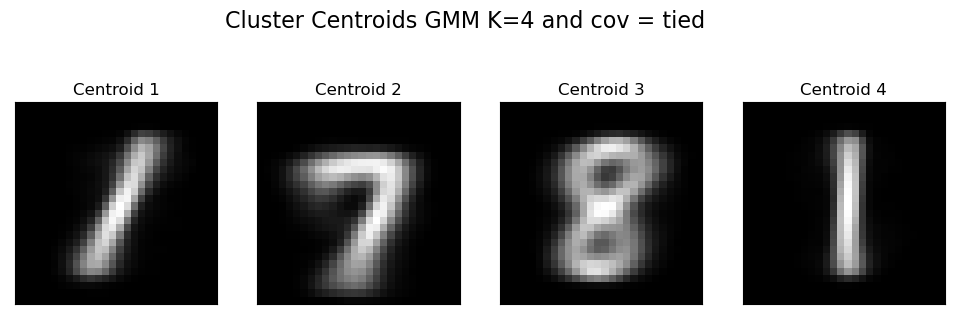

{'log_likelihood': array([2202.74907629, 2196.80923616, 2221.70306312, ..., 2060.02486862,
        2027.20310009, 1978.92761265])}

In [41]:
gmm_digits_plot(4,"diag",0)
gmm_digits_plot(4,"full",0)
gmm_digits_plot(4,"spherical",0)
gmm_digits_plot(4,"tied",0)

Obviously, the best value for K appears to be 3 for this dataset. By simply examining the centroids, we can observe that the shape of the covariance matrix matters. Indeed, 'full' covariance structure appears to perform better than 'diag,' and the best choice appears to be 'spherical' or 'tied'

We can try to check which one is the best according to their rand_score, which we'll do after looking at the outliers of the distrbution.

## Log-probabities for digits samples

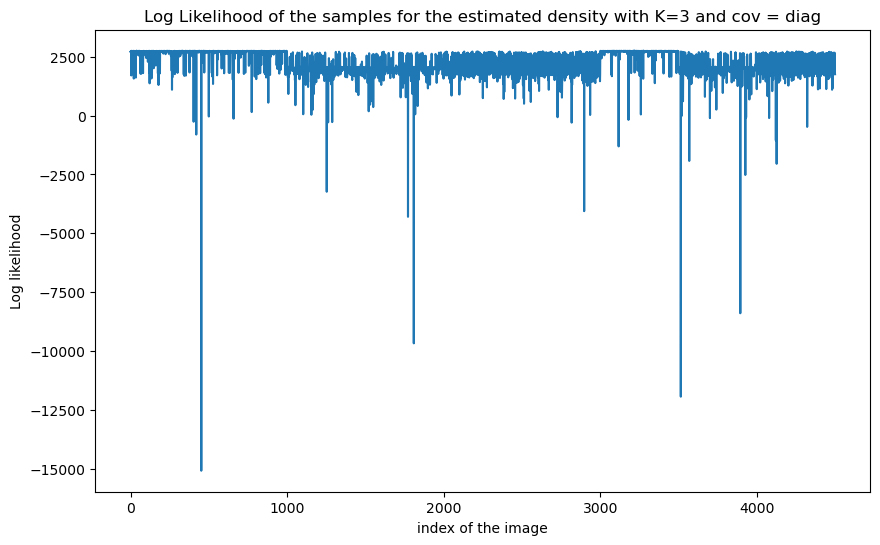

In [42]:
log_likelihood_digits = params_digits3["log_likelihood"]

figure = pl.figure(figsize=(10,6))
pl.plot(log_likelihood_digits)
pl.xlabel("index of the image")
pl.ylabel("Log likelihood")
pl.title("Log Likelihood of the samples for the estimated density with K=3 and cov = diag")
pl.show()


About ten images have a likelihood very small which means that these images should not be very well written numbers, we will thus try to plot them !

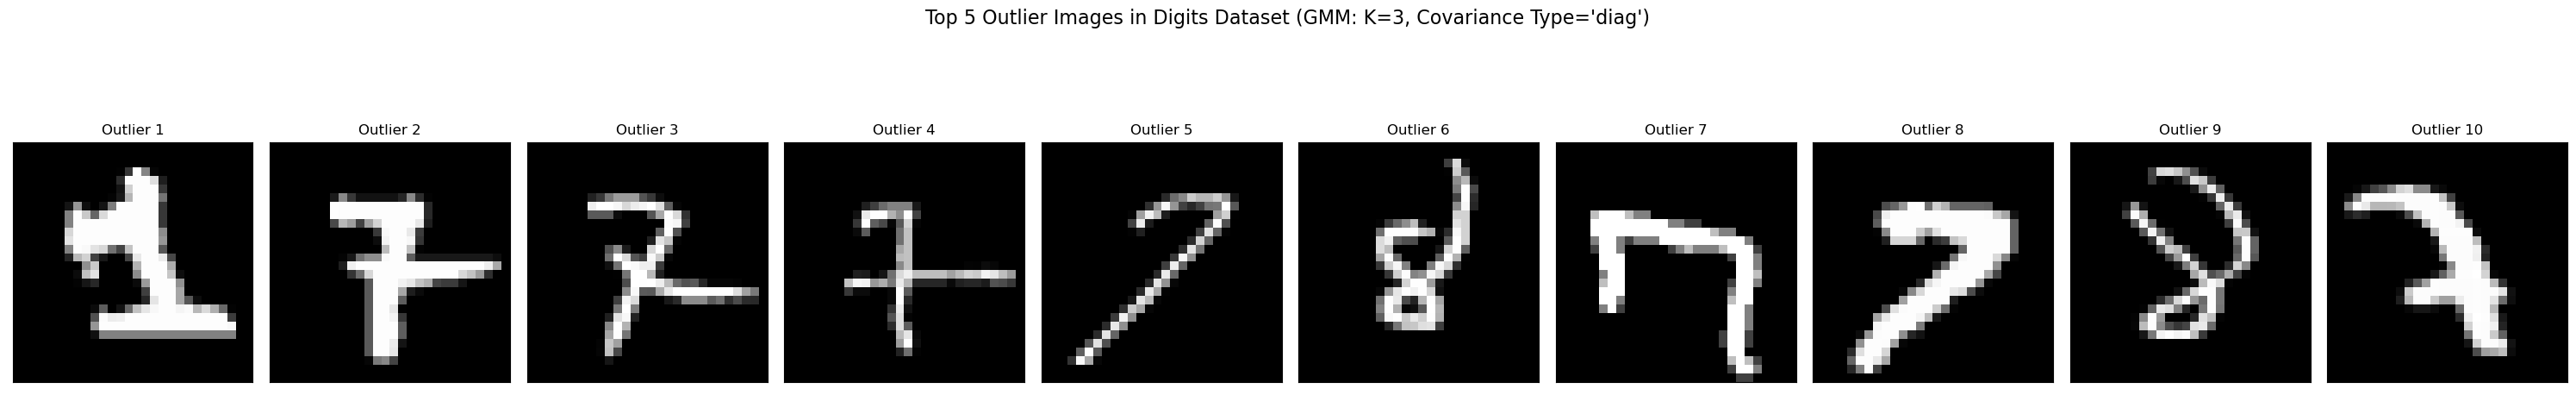

In [43]:
sorted_indices_digits = np.argsort(log_likelihood_digits)

fig, axes = pl.subplots(1, 10, figsize=(30, 5))

# Display the top 10 outlier images
for i, idx in enumerate(sorted_indices_digits[:10]):
    ax = axes[i]
    ax.imshow(x2[idx, :].reshape(28, 28), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"Outlier {i+1}", fontsize=12)

pl.suptitle("Top 5 Outlier Images in Digits Dataset (GMM: K=3, Covariance Type='diag')", fontsize=16, y=1.05)
pl.tight_layout()
pl.show()

Indeed, the images are far less more clear than the ones we saw in previous examples, there outliers for sure.

In [66]:
# Define the range of K values and covariance types to explore
K_values = range(2, 4)
covariance_types = ["diag", "full", "spherical", "tied"]

# Initialize variables to store the best configuration and Rand score
best_configuration = {"K": 0, "covariance_type": ""}
best_rand_score = 0

# Iterate over K values and covariance types to find the best configuration
for K in K_values:
    for covariance_type in covariance_types:
        # Fit a GMM with the current parameters
        gmm = GaussianMixture(n_components=K, covariance_type=covariance_type, random_state=0).fit(x2)

        # Predict cluster labels
        y_preds = gmm.predict(x2)

        # Calculate the adjusted Rand score
        rand_score = adjusted_rand_score(y_preds, y2.reshape(4500))

        # Update the best configuration and Rand score if a better one is found
        if rand_score > best_rand_score:
            best_configuration["K"] = K
            best_configuration["covariance_type"] = covariance_type
            best_adjusted_rand_score = rand_score

# Print the best configuration and Rand score
print("Best Configuration (Rand Score):", best_configuration)

Best Configuration (Rand Score): {'K': 3, 'covariance_type': 'tied'}


In [67]:
print(best_adjusted_rand_score)

0.8080100944851352


The adjusted rand score was for K-means k=3 equal to 0.75
Here, for GMM density K=3 and covariance type tied it equals to about 0.81

GMM density in this case is then better than K-means.

The reason GMM with K=3 and tied covariance performs better with an adjusted_rand_score of 0.81 compared to K-Means with K=3 and a score of 0.75 is that GMM, being a probabilistic model, can capture more complex cluster shapes and handle data with varying cluster sizes and orientations effectively. This flexibility allows GMM to better model the underlying structure of the data, resulting in higher-quality clustering and a higher adjusted_rand_score in this specific case.

## Generiting new samples from the distribution

### Temper dataset

In [68]:
# Fit a Gaussian Mixture Model to your real data
n_components = 3  # Number of components in the GMM
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(data_temperatures)

# Generate synthetic samples from the trained GMM
num_samples = len(data_temperatures)  # Generate the same number of samples as in the real data
synthetic_samples, _ = gmm.sample(num_samples)

In [69]:
def gmm_temper_plot_with_synthetic(n_components, covariance_type, random_state, data, synthetic_samples=None):

    # Create a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=random_state)

    # Fit the GMM model to the real data
    gmm.fit(data)

    # Get the estimated covariances for each component
    covariances_temper = gmm.covariances_
    centroids_temper = gmm.means_

    # Predict the component memberships for each sample
    component_memberships_temper = gmm.predict(data)

    # Generate synthetic samples if provided
    if synthetic_samples is not None:
        synthetic_component_memberships = gmm.predict(synthetic_samples)

    # Create a figure with two subplots
    fig, axes = pl.subplots(1, 2, figsize=(12, 5))

    # Plot centroids in the first subplot
    for i in range(len(centroids_temper)):
        axes[0].plot(centroids_temper[i, :], label=f"centroid {i + 1}", linewidth=2)

    # If synthetic samples are provided, plot them as well
    if synthetic_samples is not None:
        for i in range(len(synthetic_samples)):
            axes[0].plot(synthetic_samples[i, :], label=f"synthetic {i + 1}", linestyle='--', alpha=0.7)

    axes[0].set_xlabel("Months")
    axes[0].set_ylabel("Temperature (°C)")
    axes[0].set_title(f"Centroids with GMM (K={n_components}, Covariance Type = {covariance_type})\n and synthetic samples")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].grid()

    # Reduce legend size and place it outside the plot
    axes[0].legend(loc='upper right', fontsize='small', frameon=False)

    # Plot scatter plot of component memberships in the second subplot
    if synthetic_samples is not None:
        # Plot real data in blue with reduced transparency
        axes[1].scatter(data[:, 1], data[:, 0], marker='o', c=component_memberships_temper, label='Real Data', cmap='cool', alpha=0.5)
        # Plot synthetic samples in red with reduced transparency
        axes[1].scatter(synthetic_samples[:, 1], synthetic_samples[:, 0], marker='x', c=synthetic_component_memberships, label='Synthetic Samples', cmap='hot', alpha=0.5)
    else:
        axes[1].scatter(data[:, 1], data[:, 0], marker='o', c=component_memberships_temper, label='Real Data', cmap='cool')


    # Add data labels close to the points with smaller font size
    for i, ville in enumerate(villes):
        axes[1].annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)


    axes[1].set_title(f'Component Memberships of real and synthetic data, K={n_components}')
    axes[1].grid()
    axes[1].legend(loc='upper left', fontsize='small', frameon=False)

    pl.tight_layout()
    pl.show()

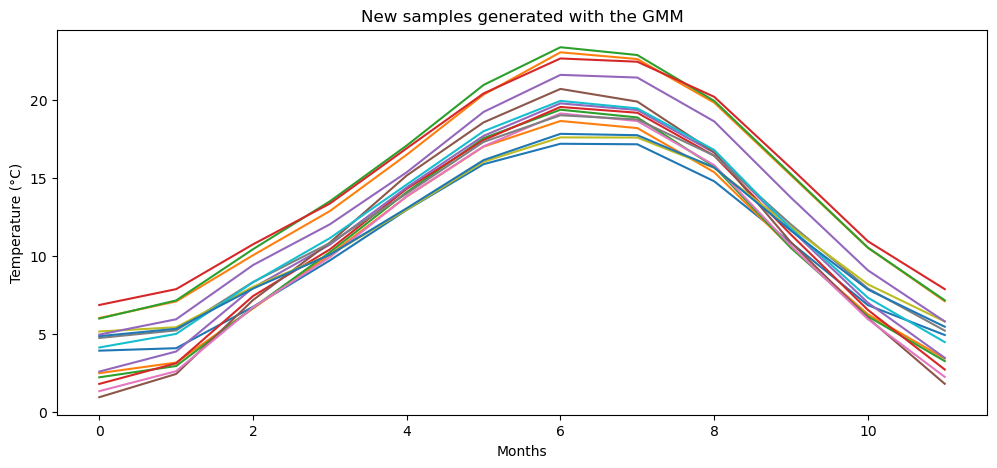

In [70]:
# Plot new centroids

pl.figure(figsize=(12,5))
pl.title("New samples generated with the GMM")
for i in range(synthetic_samples.shape[0]):
    pl.plot(synthetic_samples[i,:])
pl.xlabel("Months")
pl.ylabel("Temperature (°C)")
pl.show()

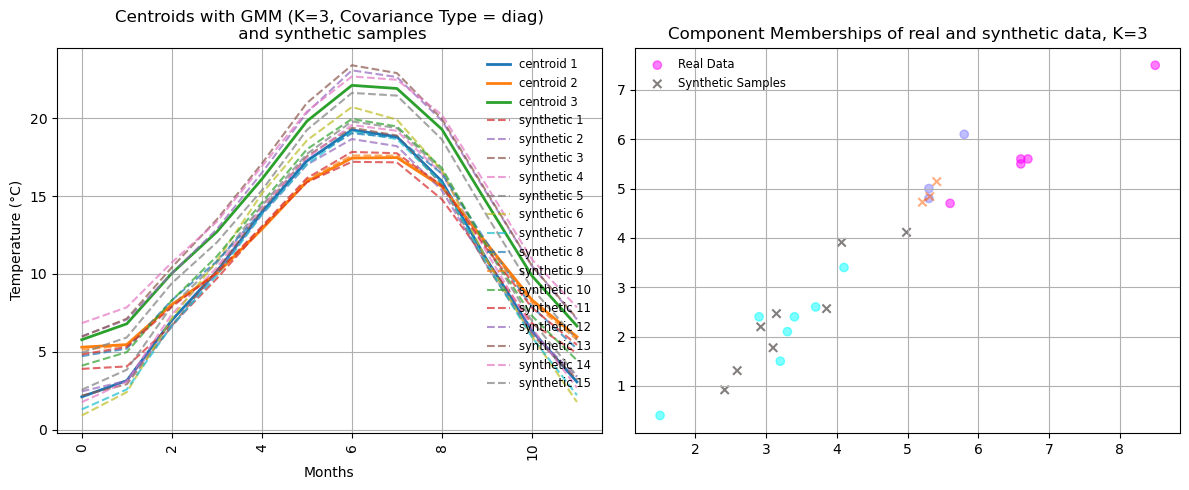

In [71]:
gmm_temper_plot_with_synthetic(3, "diag", 0, data_temperatures, synthetic_samples)


We observe that the newly generated samples follow the GMM density well (left image), but unfortunately, the precision of how they are assigned to each cluster is not great. Indeed, as we can see in the right image, samples are only assigned to two of the three clusters.

In this case, we can not very well differenciate the original data from the new samples.

### Digits dataset

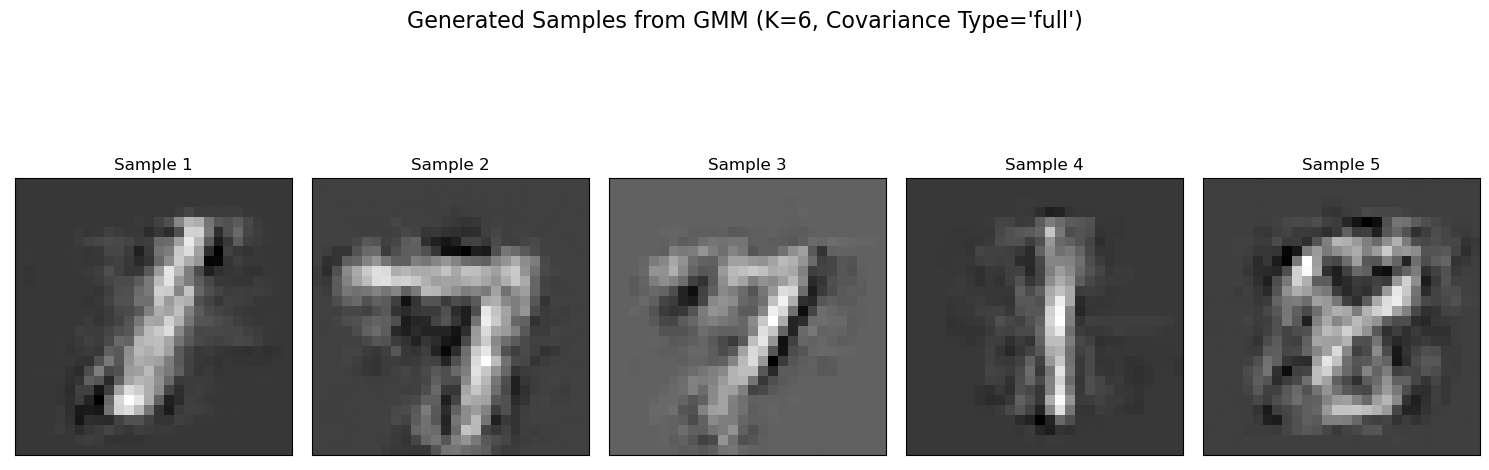

In [ ]:
# Create a Gaussian Mixture Model with 6 components, full covariance, and random state 0
gmm = GaussianMixture(n_components=5, covariance_type="full", random_state=0)

# Fit the GMM to the data
gmm.fit(x2)

# Generate 5 new samples from the GMM
new_samples, _ = gmm.sample(n_samples=5)
new_samples = new_samples.reshape(5, 28, 28)

# Create a 1x5 subplot for displaying the new samples
fig, axes = pl.subplots(1, 5, figsize=(15, 6))

# Display the new samples in grayscale
for i in range(5):
    ax = axes[i]
    ax.imshow(new_samples[i], cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Sample {i+1}", fontsize=12)

pl.suptitle("Generated Samples from GMM (K=6, Covariance Type='full')", fontsize=16)
pl.tight_layout()
pl.show()


We can clearly see the difference between the newly generated samples and the real data. In this case, the images are less clear, although we can still guess the digit.

## Dimensionality reduction

### Temperature dataset

### 1) PCA

First let's compute the covariance matrix of the data and plot it as an image.

<Figure size 1000x600 with 0 Axes>

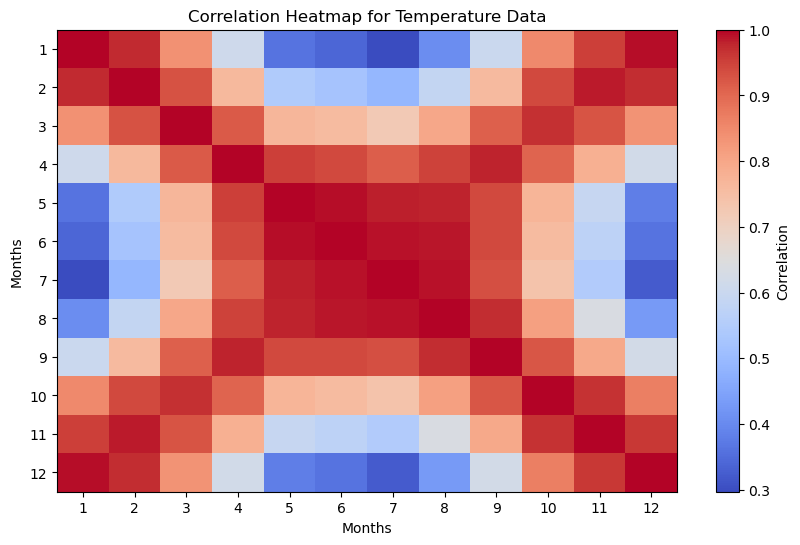

In [72]:
figure = pl.figure(figsize=(10,6))

cor_matrix_temper = np.corrcoef(data_temperatures.T)

# Create a figure with the heatmap
pl.figure(figsize=(10, 6))
pl.imshow(cor_matrix_temper, cmap='coolwarm', aspect='auto')
pl.colorbar(label='Correlation')
pl.xlabel("Months")
pl.ylabel("Months")
pl.title('Correlation Heatmap for Temperature Data')
pl.xticks(range(len(cor_matrix_temper)), range(1, len(cor_matrix_temper) + 1))
pl.yticks(range(len(cor_matrix_temper)), range(1, len(cor_matrix_temper) + 1))
pl.show()

This correlation matrix illustrates the correlation between the features month and temperature. Thus, we see that months are more correlated to each other if they are in the same season (more red) and less correlated in they are in a different season ex January and June (winter and summer) are very low correlated and so at this position it is blue.

In [76]:
import pandas as pd
from sklearn.decomposition import PCA

In [174]:
def perform_pca_temper(data, num_components=None, plot=True):
    # Perform PCA and transform the data
    pca = PCA(n_components=num_components)
    data_pca = pca.fit_transform(data)

    # Create column names for the principal components
    pc_columns = ["PC" + str(c) for c in range(1, data_pca.shape[1] + 1)]
    data_pca = pd.DataFrame(data_pca, columns=pc_columns, index=villes)

    # Calculate explained variance ratio
    explained_variance_ratio = pd.Series(dict(zip(data_pca.columns, 100.0 * pca.explained_variance_ratio_)))

    # Get the PCA components
    pca_components = pca.components_

    # Reverse transform the data
    data_reverse = pd.DataFrame(pca.inverse_transform(data_pca), columns=months[:], index=villes)

    # Store the PCA parameters
    pca_params = {
        "explained_variance_ratio": explained_variance_ratio,
        "pca_components": pca_components,
    }

    if plot:
        # Coordinates of the points in the two principal components
        PC1 = data_pca.iloc[:, 0]
        PC2 = data_pca.iloc[:, 1]

        # Visualization
        fig, axes = pl.subplots(1, 2, figsize=(12, 5))

        # Plot explained variance
        sorted_explained_variance_ratio = np.flip(explained_variance_ratio)

        axes[0].barh(np.flip(explained_variance_ratio.index), sorted_explained_variance_ratio, color='#3FAD5D')
        axes[0].set_ylabel("Principal Component")
        axes[0].set_xlabel("Percentage of Variance Explained")
        axes[0].set_title("Percentage of variance explained by principal components")
        axes[0].tick_params(axis='x', rotation=90)

        # Scatter plot of PC1 vs. PC2
        axes[1].scatter(PC1, PC2)
        for k, v in enumerate(data_pca.index):
            axes[1].text(PC1[k], PC2[k] + 0.1, v)
        axes[1].set_xlabel("Dimension 1")
        axes[1].set_ylabel("Dimension 2")
        axes[1].set_title("Projection of the samples in 2 dimensions")
        axes[1].grid()

        pl.tight_layout()
        pl.show()

    return pca_params


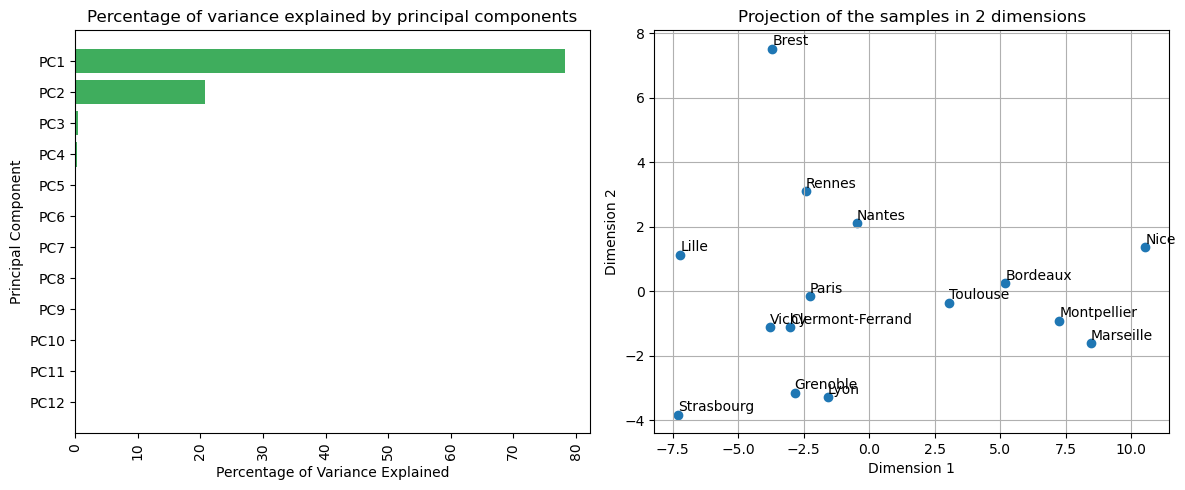

In [175]:
pca_temper = perform_pca_temper(data_temperatures)

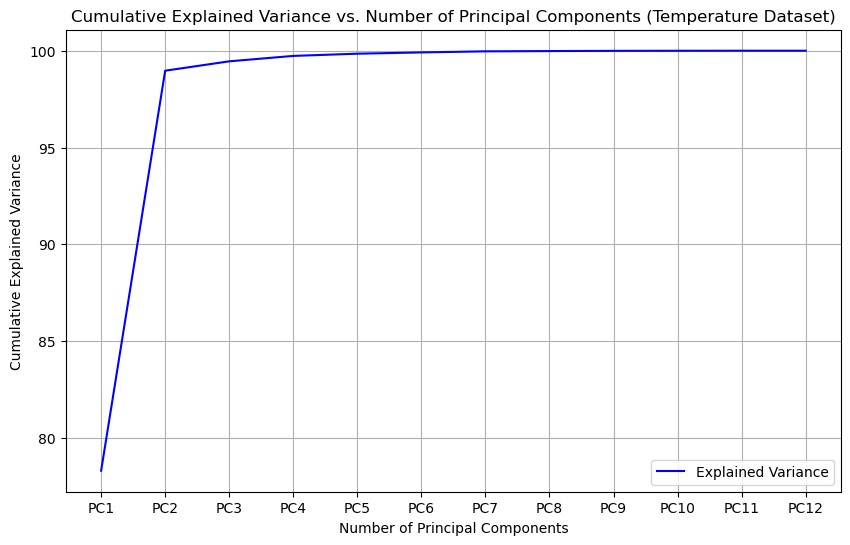

In [144]:
explained_variance_temper = np.cumsum(pca_temper["explained_variance_ratio"])

pl.figure(figsize=(10, 6))
pl.plot(explained_variance_temper, linestyle='-', color='blue', label='Explained Variance')
pl.xlabel("Number of Principal Components")
pl.ylabel("Cumulative Explained Variance")
pl.title("Cumulative Explained Variance vs. Number of Principal Components (Temperature Dataset)")
pl.grid(True)
pl.legend()
pl.show()


In [145]:
print(pca_temper["explained_variance_ratio"][0])

78.31103050656618


If we only keep the first component in the PCA, we're able to preserve about a bit less than 80% of the data variation.

It's actually impressive to see that only one composant is able to recover so much variance of the total data!

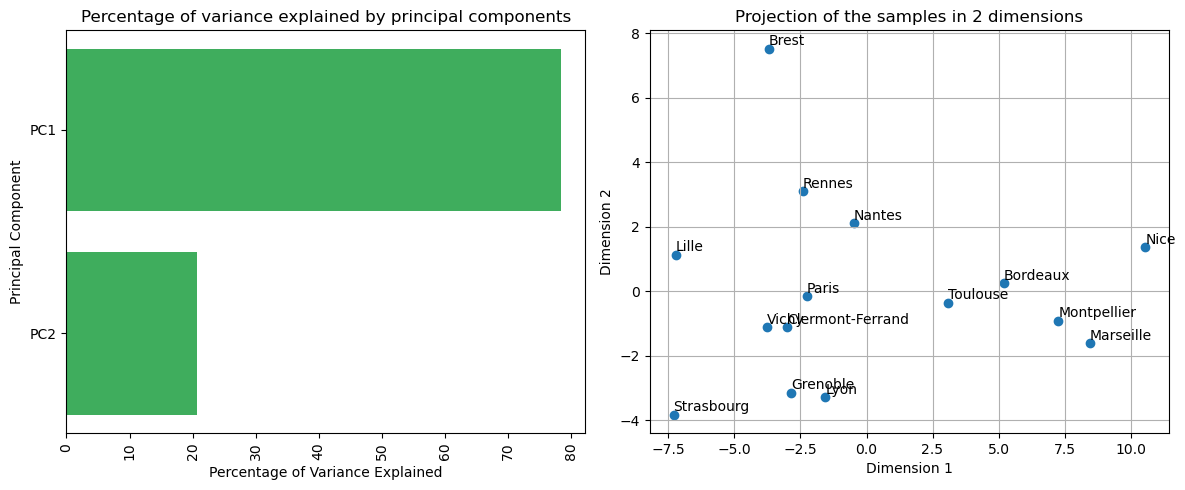

In [146]:
pca_temper2 = perform_pca_temper(data_temperatures, num_components=2)

When we use 2 principal components from the PCA, the resulting representation resembles a map of the cities. It's similar because it keeps the same relationships between the cities positions, like which cities are closer to each other. In this case, it means we can see the same north/south/west patterns as we would if we looked at the actual map using longitudes and latitudes. So, we can understand geographic similarities based on temperature data.

In [147]:
print(np.sum(pca_temper2["explained_variance_ratio"]))

98.96802035903166


With now 2 components, we have about 99% of the total variation of the data that is preserved. That's obviously far better than for one component only!

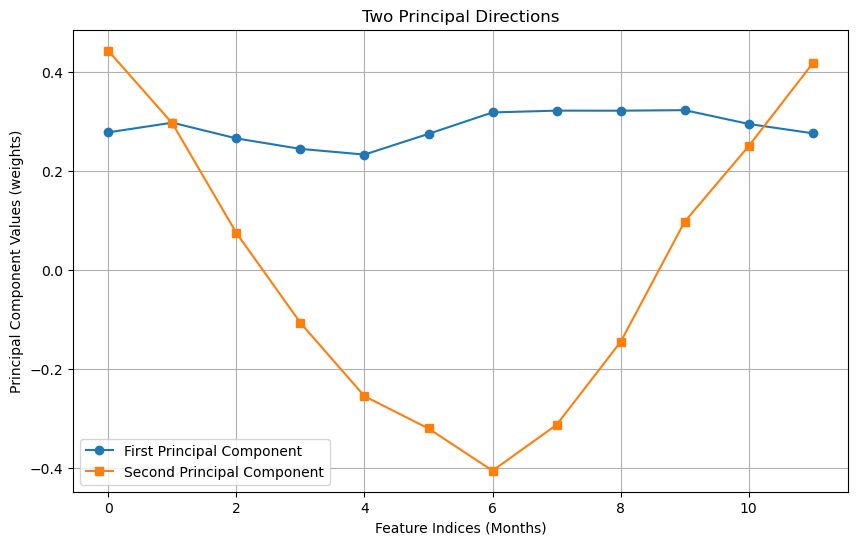

In [83]:
# Access the first two principal components
first_component = pca_temper2["pca_components"][0]
second_component = pca_temper2["pca_components"][1]

# Create x-values (e.g., feature indices)
x_values = np.arange(len(first_component))

# Create plots for the first and second principal components
pl.figure(figsize=(10, 6))
pl.plot(x_values, first_component, label="First Principal Component", marker='o', linestyle='-')
pl.plot(x_values, second_component, label="Second Principal Component", marker='s', linestyle='-')
pl.xlabel("Feature Indices (Months)")
pl.ylabel("Principal Component Values (weights)")
pl.title("Two Principal Directions")
pl.legend()
pl.grid(True)
pl.show()


The first principal component (PC1) represents a weighted combination of the original temperature features (months) where some months have positive weights, indicating a positive correlation with temperature, while others have negative weights, indicating a negative correlation. Mathematically, PC1 can be expressed as:

$$PC1 = \sum_{i=1}^{12} w_1i * Month_i$$

Similarly, the second principal component (PC2) is another linear combination of the original features with their respective weights, denoted as $$w_{2,i}$$

Moving along PC1 corresponds to changing the values of the original months, resulting in variations primarily related to seasonal changes. In contrast, moving along PC2 captures variations that are not directly tied to seasonal patterns.

In summary, PC1 and PC2 represent linear combinations of the original temperature data that capture the most significant sources of variation, making them useful for dimensionality reduction and understanding patterns in the data.







### Reconstrucing the data

In [84]:
def perform_pca_reconstruction(data, num_components=None, plot=True, sample_indices=None):
    # Perform PCA and transform the data
    pca = PCA(n_components=num_components)
    data_pca = pca.fit_transform(data)

    # Create column names for the principal components
    pc_columns = ["PC" + str(c) for c in range(1, data_pca.shape[1] + 1)]
    data_pca = pd.DataFrame(data_pca, columns=pc_columns, index=villes)

    # Reverse transform the data for reconstruction
    reconstructed_data = pd.DataFrame(pca.inverse_transform(data_pca), columns=months[:], index=villes)

    if plot and sample_indices:
        # Choose a few samples to visualize the reconstruction
        pl.figure(figsize=(15, 5))

        for i, sample_index in enumerate(sample_indices):
            original_sample = data[sample_index]
            reconstructed_sample = reconstructed_data.iloc[sample_index]

            pl.plot(range(1, len(months) + 1), original_sample, label=f'Original Sample {sample_index}', color='blue')
            pl.plot(range(1, len(months) + 1), reconstructed_sample, label=f'Reconstructed Sample {sample_index} (p={num_components})', color='red')
            pl.title(f'Reconstruction of Sample {sample_index} (p={num_components})')
            pl.xlabel('Months')
            pl.ylabel('Temperature (°C)')
            pl.legend()

        pl.tight_layout()
        pl.show()

    return reconstructed_data


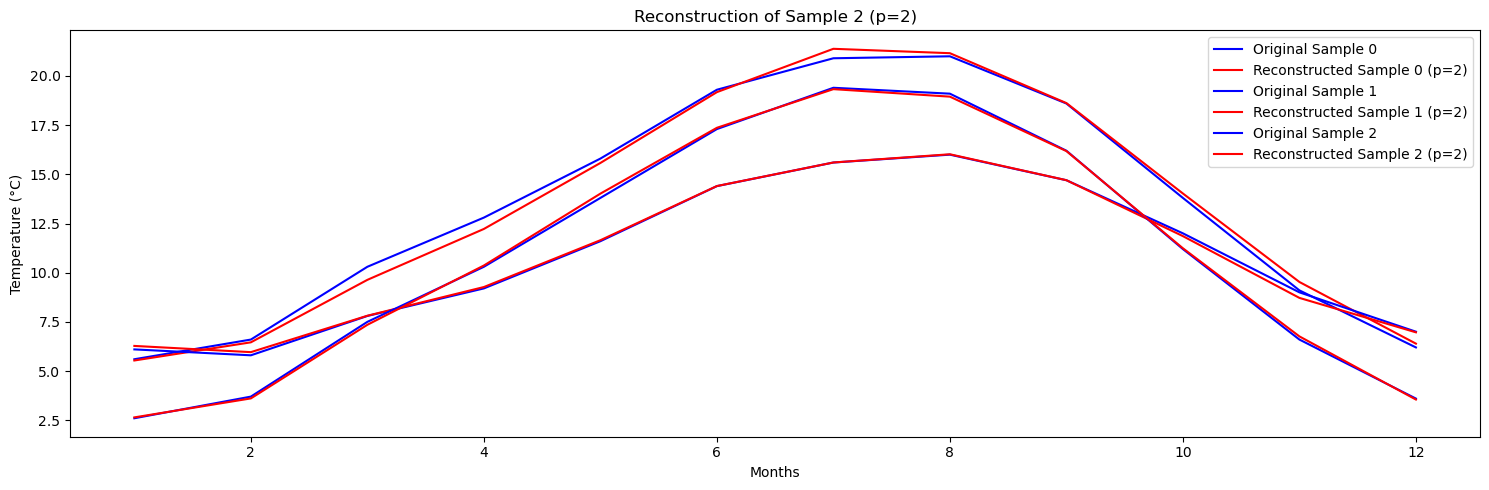

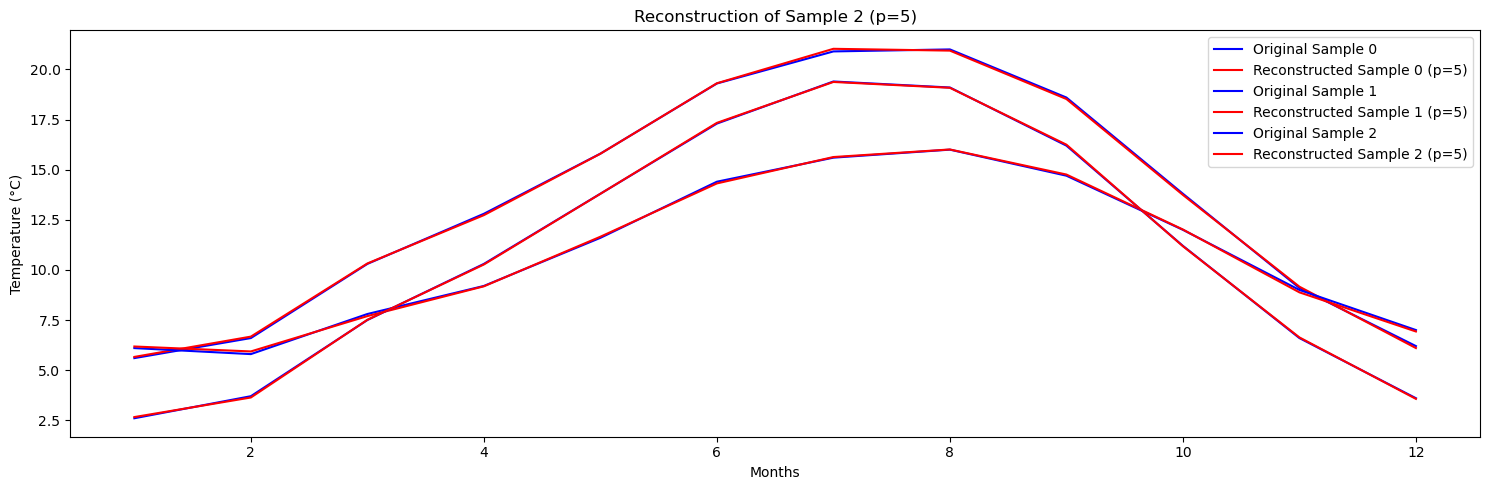

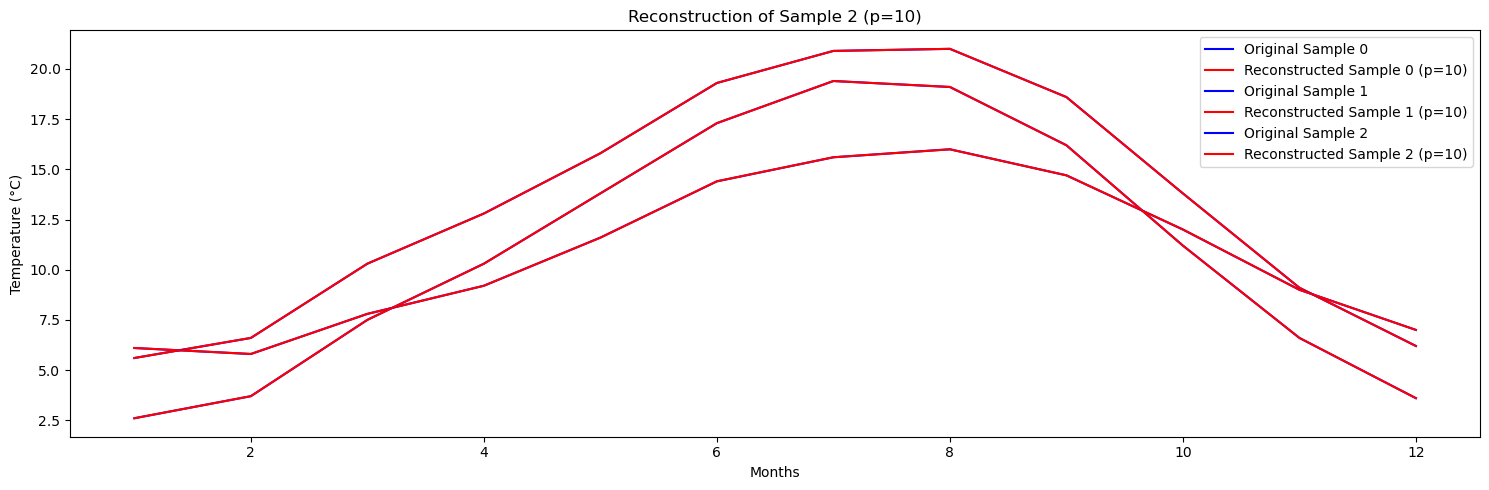

In [85]:
# Reconstruct data with different subspace dimensions
reconstructed_data_p2 = perform_pca_reconstruction(data_temperatures, num_components=2, sample_indices=[0, 1, 2])
reconstructed_data_p5 = perform_pca_reconstruction(data_temperatures, num_components=5, sample_indices=[0, 1, 2])
reconstructed_data_p10 = perform_pca_reconstruction(data_temperatures, num_components=10, sample_indices=[0, 1, 2])

The number of principal components 'p' in PCA affects the quality of data reconstruction. When 'p' is small, the reconstructed data loses some detail, resulting in less faithful representations. With larger 'p,' the reconstruction closely resembles the original data. Principal components represent significant patterns in the data, so increasing 'p' captures more variation and detail. In the context of temperature data, this means that selecting more principal components (higher 'p') would better preserve seasonal temperature variations and nuances, while lower 'p' may result in a simplified, less accurate representation.

For p=10, the data is perfectly reconstructed such as we can't see the difference with the original samples.

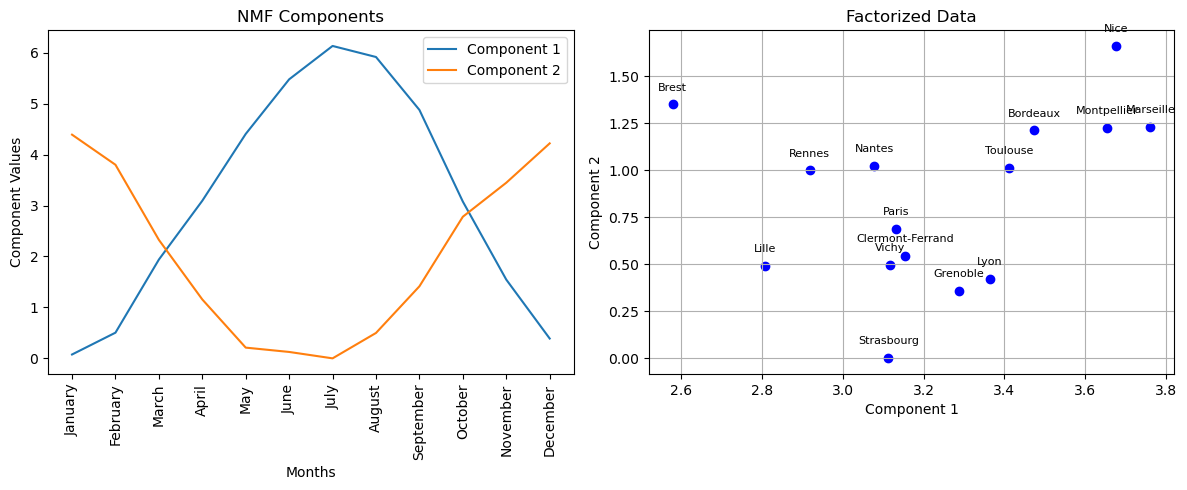

In [171]:
from sklearn.decomposition import NMF

# Specify the number of components for NMF
n_components = 2  # You can adjust this as needed

# Create an NMF model
nmf = NMF(n_components=n_components, init='nndsvd', random_state=0)

# Fit the NMF model to the positive temperature data
W = nmf.fit_transform(data_temperatures)
H = nmf.components_

# Visualize the NMF components
pl.figure(figsize=(12, 5))
pl.subplot(1, 2, 1)
for i in range(n_components):
    pl.plot(H[i, :], label=f"Component {i+1}")
pl.xlabel("Months")
pl.ylabel("Component Values")
pl.title("NMF Components")
pl.xticks(np.arange(len(months)), months, rotation=90)
pl.legend()

# Visualize the factorized data
pl.subplot(1, 2, 2)
pl.scatter(W[:, 0], W[:, 1], c='blue', cmap='viridis')


pl.xlabel("Component 1")
pl.ylabel("Component 2")
pl.title("Factorized Data")
pl.grid(True)

# Ajoutez les annotations des villes
for i, city in enumerate(villes):
    pl.annotate(city, (W[i, 0], W[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

pl.tight_layout()
pl.show()

The Non-Negative Matrix Factorization (NMF) results reveal two distinct patterns in the positive temperature data.

The first component represents seasonal temperature variations, with positive weights across specific months. 
The second component captures non-seasonal temperature changes, characterized by varying weights across months. NMF effectively decomposes the data into interpretable components, offering insights into both seasonal and non-seasonal temperature trends. 

This method can aid in identifying regions with similar temperature behavior and understanding the underlying factors influencing temperature variations.

### TNSE

In [87]:
from sklearn.manifold import TSNE

In [205]:

def tsne_temper(data_temperatures, perplexity=30, image_size=(6, 4)):
    # Create a TSNE model with 2 components and specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)

    # Fit the TSNE model to your data
    tsne_embedding = tsne.fit_transform(data_temperatures)

    # Plot the TSNE embedding with city names
    pl.figure(figsize=image_size)
    pl.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c='blue', cmap='viridis')

    # Add city names next to the corresponding points
    for i, city in enumerate(villes):
        pl.text(tsne_embedding[i, 0] + 0.1, tsne_embedding[i, 1] + 0.05, city, fontsize=8)

    pl.xlabel("Component 1")
    pl.ylabel("Component 2")
    pl.title(f"TSNE Embedding with n_composants=2 and (perplexity={perplexity})")
    pl.grid(True)
    pl.show()

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


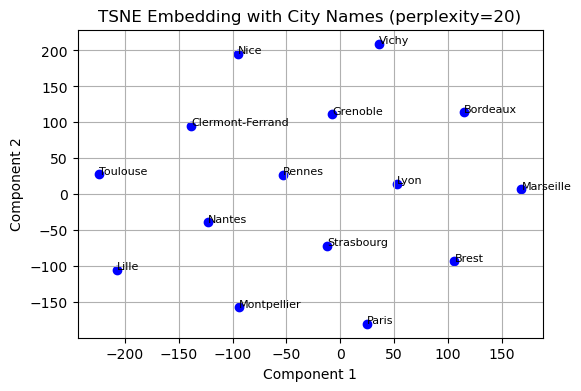

In [197]:
tsne_temper(data_temperatures, perplexity=20)


Here, we can clearly see the importance of using well the perplexity parameter while using TNSE !
Indeed, at arround perplexity = 20, the map stabilize itself as we can see on the figure above.

On this plot, the embending does not recover any geographical relations between cities as all the cities are equally separated from others.
Thus, ce can't interpret anything from my point of view. Let's see what will happen if we change the perplexity.



/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


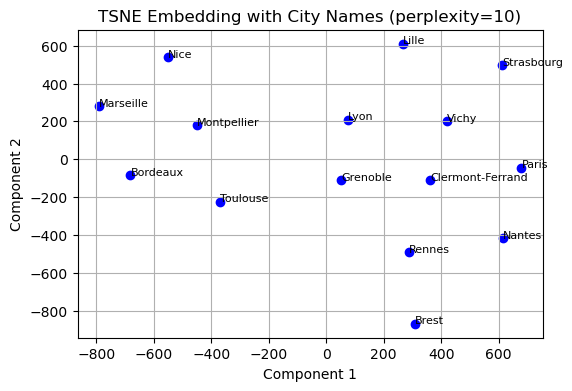

In [90]:
tsne_temper(data_temperatures, perplexity=10)


/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


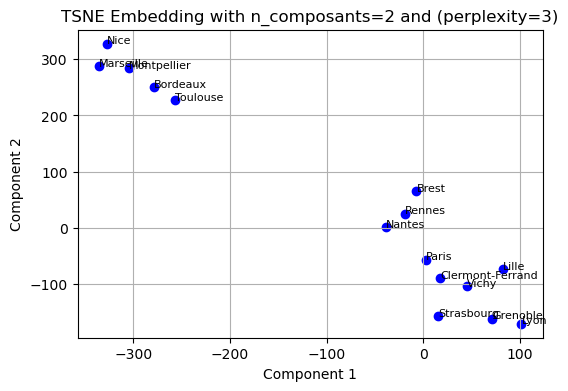

In [206]:
tsne_temper(data_temperatures, perplexity=3)


/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


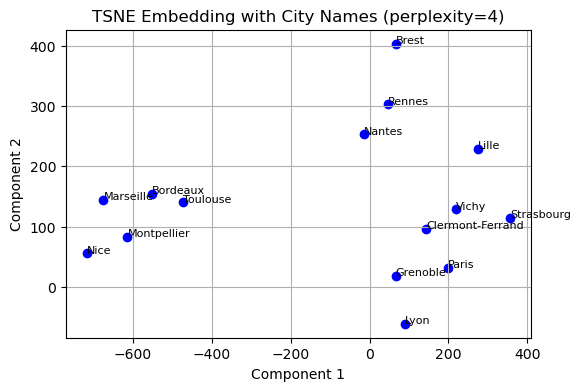

In [204]:
tsne_temper(data_temperatures, perplexity=4)


For perplecity = 4 and perplexity = 3 we can clearly see different clusters on the plot. The geographical positions are preserved in some way (distance between the cities) since TNSE does preserve the probability distribution but we do not recover a clear French map as before. Moreover, the clusters make sense with temperatures too.

Wee can see that for those both exmaples, TSNE recover clusters :

- 2 clusters for perplexity = 3
- 3 clusters for perplexity = 4

They are similar to the ones we have seen before with K-Means and GMM.

## Digits dataset

### 1) PCA

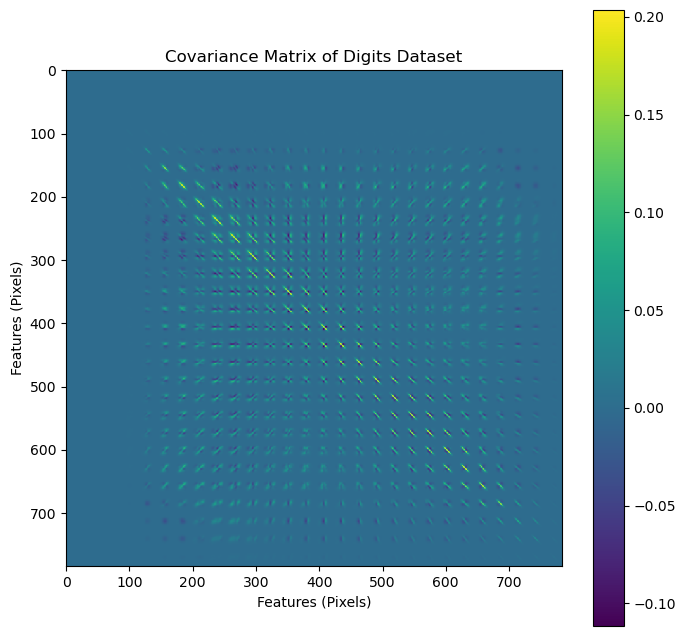

In [93]:
# Compute the covariance matrix of the data
cov_matrix = np.cov(x2.T)

# Plot the covariance matrix as an image
pl.figure(figsize=(8, 8))
pl.imshow(cov_matrix, cmap='viridis', origin='upper', interpolation='nearest')
pl.colorbar()
pl.title("Covariance Matrix of Digits Dataset")
pl.xlabel("Features (Pixels)")
pl.ylabel("Features (Pixels)")
pl.show()


This covariance matrix is not very usefull in comparaison to the temparature dataset. Indeed, pixels do not have a lot of correletion between them as we could expect.

In [153]:
def perform_pca_digits(data, n_components=None, plot=True):
    # Perform PCA and transform the data
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    # Create column names for the principal components
    pc_columns = ["PC" + str(c) for c in range(1, data_pca.shape[1] + 1)]
    data_pca_df = pd.DataFrame(data_pca, columns=pc_columns, index=y2.flatten())

    # Calculate explained variance ratio
    explained_variance = pd.Series(dict(zip(data_pca_df.columns, 100.0 * pca.explained_variance_ratio_)))

    params = {
        "data_pca": data_pca_df,
        "explained_variance": explained_variance,
        "component_pca": pca.components_,
    }

    if plot:
        # Coordinates of the points in the two principal components
        PC1 = data_pca_df.iloc[:, 0]
        PC2 = data_pca_df.iloc[:, 1]

        # Visualization
        pl.figure(figsize=(12, 5))
        pl.subplot(1, 2, 1)
        pl.xticks(rotation=90)
        pl.barh(np.flip(explained_variance.index[:]), np.flip(explained_variance[:]), color='#3FAD5D')
        pl.ylabel("Principal Component")
        pl.xlabel("Percentage of Variance Explained")

        pl.subplot(1, 2, 2)
        pl.scatter(PC1, PC2, c=y2.flatten(), cmap="tab10")
        pl.xlabel("First Principal Component")
        pl.ylabel("Second Principal Component")
        pl.colorbar(label="Digit Class")
        pl.title(f"Digits projected on the 2 principal components found by the PCA")

    pl.tight_layout()
    pl.show()

    return params

In [182]:
params_digits = perform_pca_digits(x2,plot=False)

<Figure size 640x480 with 0 Axes>

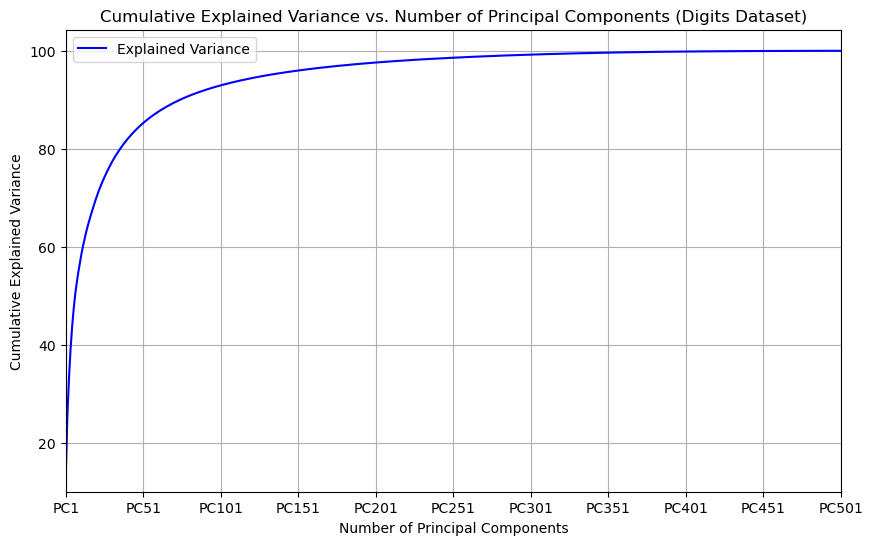

In [196]:
explained_variance_digits = np.cumsum(params_digits["explained_variance"])

x_labels = list(range(0, len(explained_variance_digits) + 1, 50))

pl.figure(figsize=(10, 6))
pl.plot(explained_variance_digits, linestyle='-' ,color='blue', label='Explained Variance')
pl.xlabel("Number of Principal Components")
pl.ylabel("Cumulative Explained Variance")
pl.title("Cumulative Explained Variance vs. Number of Principal Components (Digits Dataset)")
pl.grid(True)
pl.legend()

pl.xticks(x_labels)
pl.xlim(0, 500)  # Les valeurs minimales et maximales de l'axe des x

pl.show()


It is truly interesting to observe the disparity in the cumulative variance curve when compared to the previous dataset. Indeed, we have a smoother curve that converges more slowly. This is attributable to the fact that the information is more evenly distributed among the components.

In order to recapture a substantial portion of the variance, we should now retain a significantly higher number of components than before—approximately 100 components are needed to recover approximately 95% of the variance."

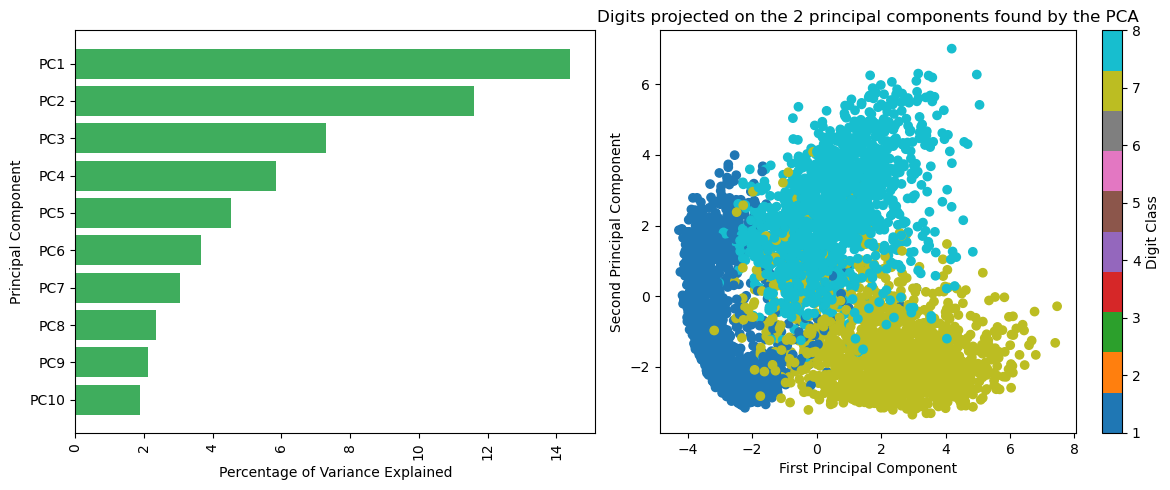

In [181]:
params_digits = perform_pca_digits(x2,10)

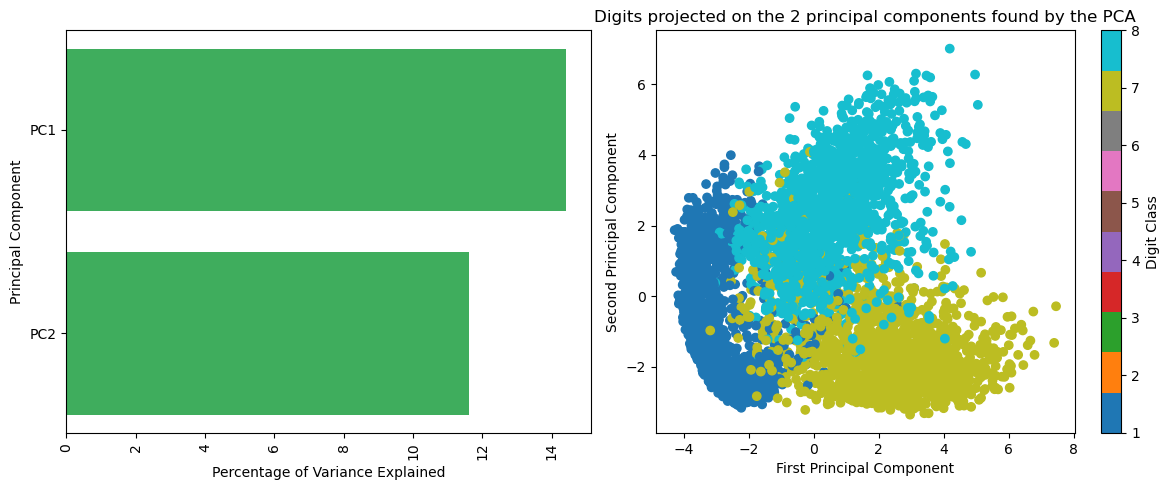

In [209]:
params_digits = perform_pca_digits(x2,2)

In two dimensions as we could expect, it is indeed challenging for PCA to separate the classes effectively, even though some level of distinction is perceptible. The overlap between the three classes appears somewhat disorderly.

I admit I would have guess a worse result than this.

### Reconstructing the data

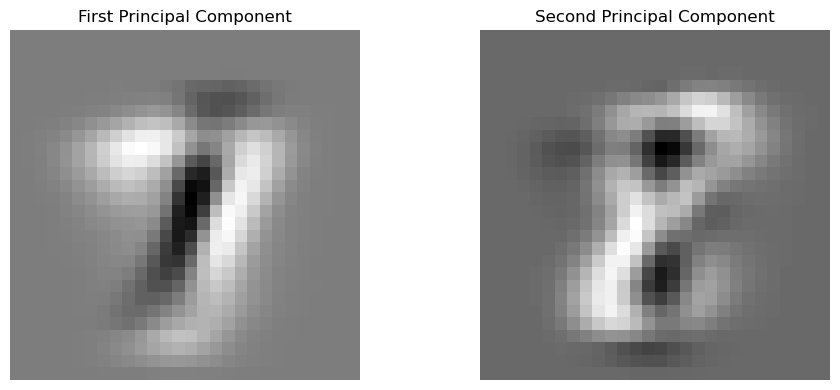

In [210]:
# Plot the first component
pl.figure(figsize=(10, 4))
pl.subplot(1, 2, 1)
pl.imshow(first_component.reshape(28, 28), cmap='gray')
pl.title("First Principal Component")
pl.axis('off')

# Plot the second component
pl.subplot(1, 2, 2)
pl.imshow(second_component.reshape(28, 28), cmap='gray')
pl.title("Second Principal Component")
pl.axis('off')

pl.tight_layout()
pl.show()

For n_components = 2:

The interpretation of the first component is challenging, as it seems to be a combination of features from both 7 and 1. Conversely, the second principal component appears to be representative of the number 8. It would be intriguing to examine the impact on data reconstruction based on the dimension we choose when performing PCA. That's what we are going to explore.

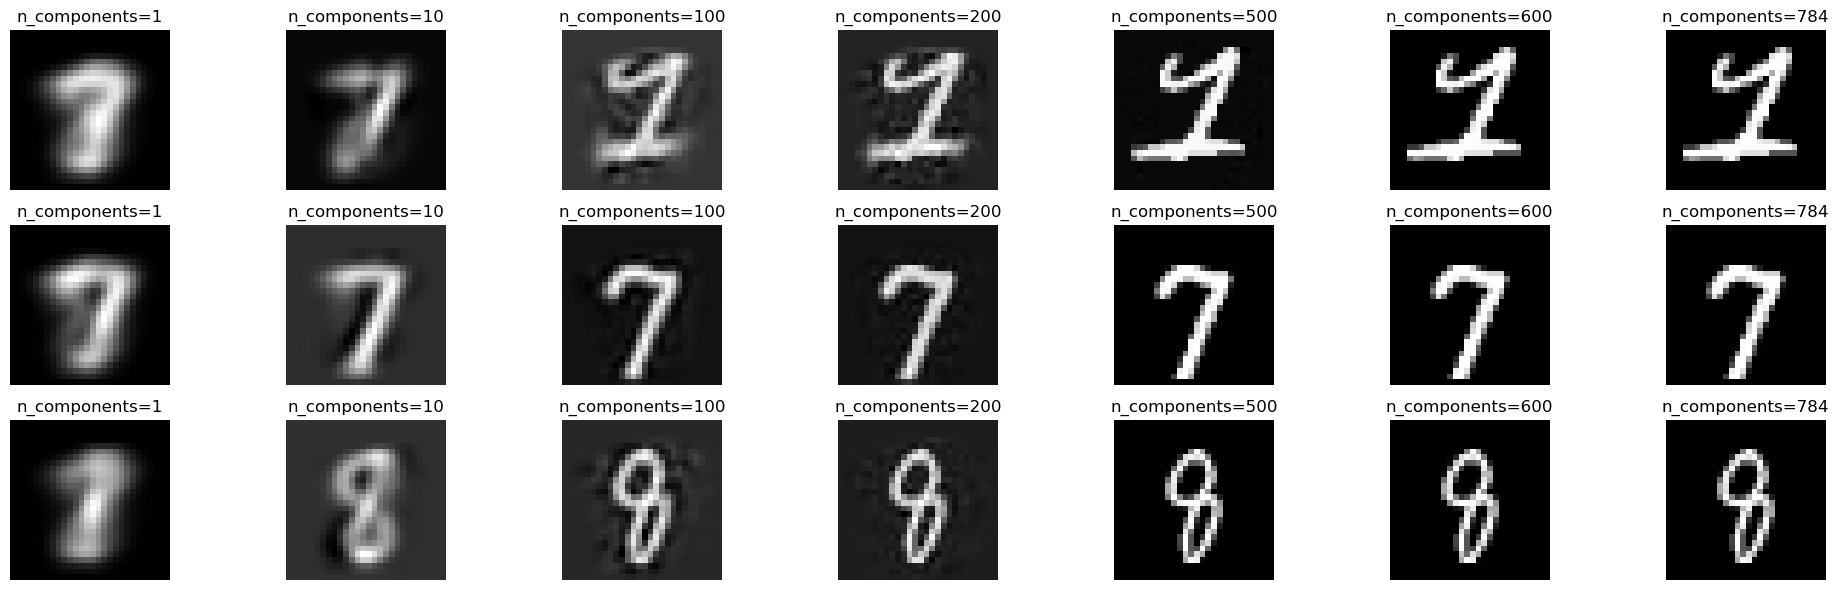

In [211]:
# Define the components and digits you want to visualize
components = [1, 10, 100, 200, 500, 600, 784]
ids_digit = [500, 1500, 2500]

# Create subplots
fig, axes = pl.subplots(len(ids_digit), len(components), figsize=(20, 6))

# Loop over rows (digits)
for i, digit_id in enumerate(ids_digit):
    # Loop over columns (PCA components)
    for j, num_components in enumerate(components):
        # Fit PCA with the specified number of components
        pca = PCA(n_components=num_components)
        X_pca = pca.fit_transform(x2)

        # Reconstruct the digit from PCA components
        reconstructed_digit = pca.inverse_transform(X_pca[digit_id])

        # Reshape and display the reconstructed digit
        axes[i, j].imshow(reconstructed_digit.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'n_components={num_components}')
        axes[i, j].axis('off')

# Add y-axis labels
for i, digit_id in enumerate(ids_digit):
    axes[i, 0].set_ylabel(f'Digit {digit_id}', rotation=0, labelpad=20, fontsize=12)

# Add a common x-axis label
pl.xlabel('PCA Reconstruction', fontsize=14)

pl.tight_layout()
pl.show()

For some randomly selected samples, the difference becomes significantly more pronounced as we increase the value of n_components. This aligns with our expectations. When n_components reaches its maximum value, the images are perfectly reconstructed!

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


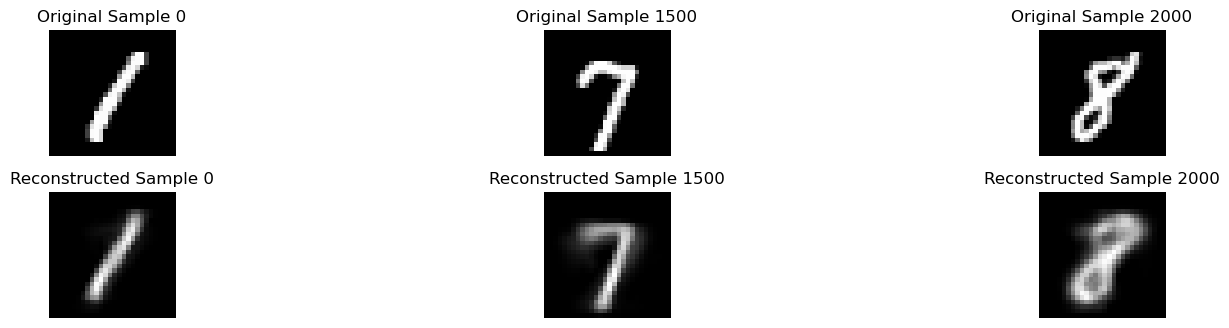

In [102]:
# Number of components for NMF
n_components = 10

# Create an NMF model
nmf = NMF(n_components=n_components, init='nndsvd', random_state=0)

# Fit the NMF model
W = nmf.fit_transform(x2)
H = nmf.components_

# Choose some sample indices to visualize the reconstructed images
sample_indices = [0, 1500, 2000]

# Reconstruct the data from NMF components
reconstructed_data = np.dot(W, H)

# Visualize the reconstructed images
pl.figure(figsize=(15, 5))

for i, sample_index in enumerate(sample_indices):
    original_sample = x2[sample_index]
    reconstructed_sample = reconstructed_data[sample_index]

    pl.subplot(3, len(sample_indices), i + 1)
    pl.imshow(original_sample.reshape(28, 28), cmap='gray')
    pl.title(f'Original Sample {sample_index}')
    pl.axis('off')

    pl.subplot(3, len(sample_indices), len(sample_indices) + i + 1)
    pl.imshow(reconstructed_sample.reshape(28, 28), cmap='gray')
    pl.title(f'Reconstructed Sample {sample_index}')
    pl.axis('off')

pl.tight_layout()
pl.show()


NMF is an other way to reconstruct our data. For n_componants=10, we have a bit better results than with PCA. We can intepret than for this case the variance of the total data should be recovered quicker than PCA.

### TNSE

In [212]:
def plot_tsne_digits(digits_data, class_labels, p):

    # Create a TSNE model with 2 components
    tsne_digits = TSNE(n_components=2, random_state=0, perplexity=p)

    # Fit the TSNE model to the data
    tsne_embedding_digits = tsne_digits.fit_transform(digits_data)

    # Plot the TSNE embedding with colored points based on class labels
    pl.figure(figsize=(10, 8))
    pl.scatter(tsne_embedding_digits[:, 0], tsne_embedding_digits[:, 1], c=class_labels, cmap='viridis')

    pl.xlabel("Component 1")
    pl.ylabel("Component 2")
    pl.title(f"t-SNE Embedding for digits with perplexity={p}")
    pl.grid(True)
    pl.colorbar()
    pl.show()

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


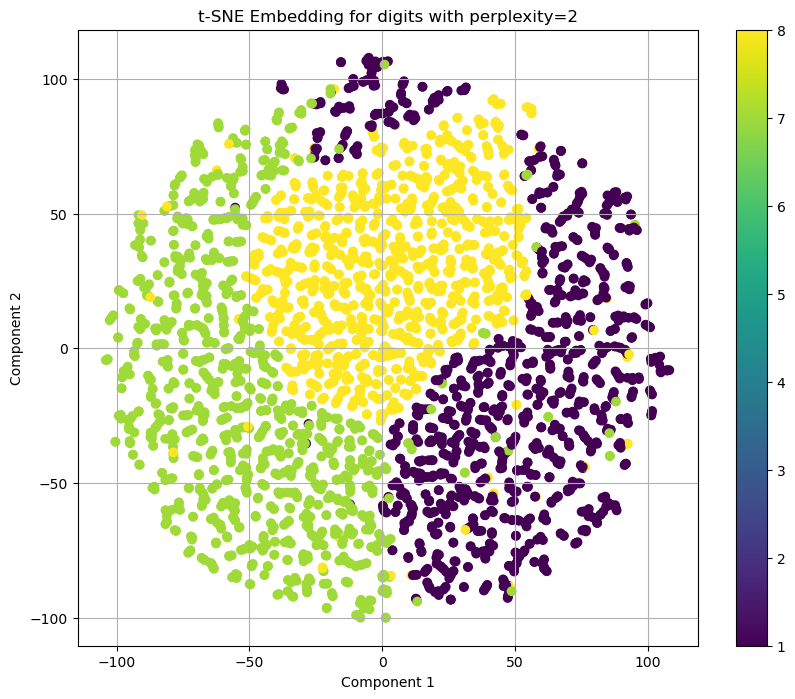

In [213]:
plot_tsne_digits(x2, y2, p=2)

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


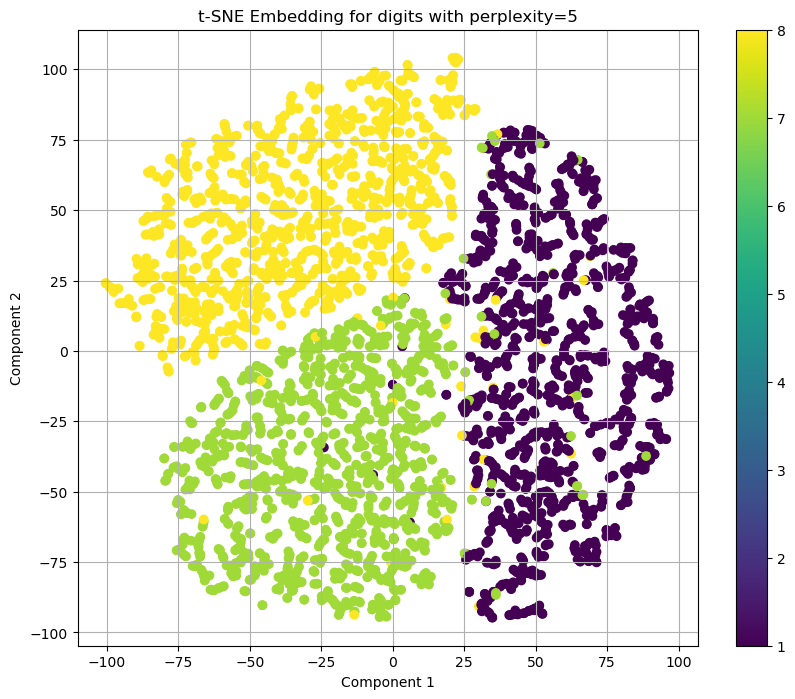

In [214]:
plot_tsne_digits(x2, y2, p=5)

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


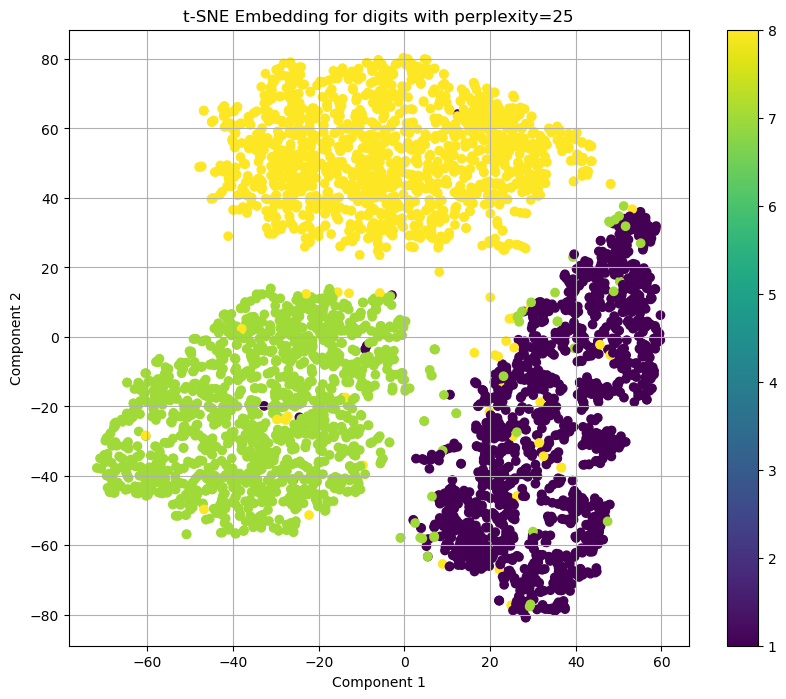

In [215]:
plot_tsne_digits(x2, y2, p=25)

The results of t-SNE are quite remarkable. It seems to offer better discrimination than PCA. By adjusting the perplexity parameter, we can achieve excellent two-dimensional embeddings where our classes are well-separated.

However, we must exercise caution and avoid setting perplexity too low, as doing so may lead to insufficient separation between our classes.

## Conclusion - personal discussion on the lab

The unsupervised learning lab I worked on was both extensive and comprehensive. It provided me with the opportunity to explore various algorithms and methods, allowing me to evaluate their performance through both qualitative assessments and precise criteria such as rand-score, BIA, and AIC.

Here are some aspects I appreciated and areas where I faced challenges:

What I Liked:

- The breadth of algorithms and methods covered, which enabled me to discern their strengths and weaknesses.

- The ability to interpret results using relevant evaluation criteria.

What I Struggled With:

- Grasping the interpretations of results for algorithms that have a steeper learning curve, such as PCA and NMF.

- Structuring the notebook effectively, especially when transitioning between different datasets.

- Being in a situation where the figure plotted cannot be interprated very well